# 가설 설정
- 젠트리피케이션 상권 지역은 폐업 영업 평균 개월 수가 짧아질 것이다.

In [1]:
# NanumGothic 폰트 설치 (이미 설치되어 있어도 재설치)
!apt-get update -qq
!apt-get install -qq -y fonts-nanum

# Matplotlib 폰트 캐시 삭제 (이전 설정이 꼬였을 가능성 해결)
!rm -rf ~/.cache/matplotlib

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# NanumGothic 폰트 경로 지정
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"

# Matplotlib에서 한글 폰트 강제 적용
fm.fontManager.addfont(font_path)
plt.rcParams["font.family"] = "NanumGothic"
plt.rcParams["axes.unicode_minus"] = False  # 마이너스 기호 깨짐 방지

# 폰트 적용 확인 (디버깅용)
print("사용되는 폰트:", plt.rcParams["font.family"])

사용되는 폰트: ['NanumGothic']


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 한글 컬럼으로 바꾸기

In [4]:
# # 파일 경로
# file_path = "/content/drive/MyDrive/한국경제신문강의/ML 프로젝트/data/상권_500m_읍면동.csv"

# # CSV 파일 불러오기 (인코딩 자동 감지)
# def load_csv(file_path):
#     try:
#         return pd.read_csv(file_path, encoding='utf-8')
#     except UnicodeDecodeError:
#         try:
#             return pd.read_csv(file_path, encoding='cp949')
#         except UnicodeDecodeError:
#             return pd.read_csv(file_path, encoding='euc-kr')

# # 데이터 불러오기
# df = load_csv(file_path)

# # 컬럼명 변경 (스크린샷 기준)
# column_mapping = {
#     "주소명": "주소명",
#     "category": "카테고리",
#     "TRDAR_SE_C": "상권구분코드",
#     "TRDAR_SE_1": "상권구분코드명",
#     "TRDAR_CD": "상권코드",
#     "TRDAR_CD_N": "상권코드명",
#     "SIGNGU_CD": "자치구코드",
#     "SIGNGU_CD_": "자치구코드명",
#     "ADSTRD_CD": "행정동_코드",
#     "ADSTRD_CD_": "행정동코드명",
#     "EMD_CD": "법정동코드",
#     "EMD_KOR_NM": "법정동코드명",
# }

# # 컬럼명 변경 적용
# df.rename(columns=column_mapping, inplace=True)

# # 변경된 컬럼 확인
# print("변경된 컬럼명:")
# print(df.columns.tolist())

# # 상권코드명에서 중복 제거
# df = df.drop_duplicates(subset="상권코드명")

# # 새로운 CSV 파일로 저장
# output_filename = "/content/상권_젠트리카테고리_추가.csv"
# df.to_csv(output_filename, index=False, encoding='utf-8-sig')

## 상권변화지표 데이터 카테고리별로 변환

In [5]:
import pandas as pd
import statsmodels.api as sm

# 파일 경로 설정
file_path_1 = "/content/drive/MyDrive/한국경제신문강의/ML 프로젝트/data/상권_젠트리카테고리_추가.csv"
file_path_2 = "/content/drive/MyDrive/한국경제신문강의/ML 프로젝트/data/상권 데이터/서울시 상권분석서비스(상권변화지표-상권).csv"

# CSV 파일 불러오기
def load_csv(file_path):
    try:
        return pd.read_csv(file_path, encoding='utf-8')
    except UnicodeDecodeError:
        try:
            return pd.read_csv(file_path, encoding='cp949')
        except UnicodeDecodeError:
            return pd.read_csv(file_path, encoding='euc-kr')

# 데이터 불러오기
df_젠트리 = load_csv(file_path_1)
df_상권 = load_csv(file_path_2)

# 컬럼명 정리
df_젠트리.columns = [col.replace("_", "") for col in df_젠트리.columns]
df_상권.columns = [col.replace("_", "") for col in df_상권.columns]

# 필요한 컬럼만 선택
df_젠트리 = df_젠트리[['상권코드명', '주소명', '카테고리']]
df_상권 = df_상권.copy()

# 주소명과 카테고리를 상권코드명에 따라 매칭
df_상권 = df_상권.merge(df_젠트리, how='left', left_on='상권코드명', right_on='상권코드명')

# 주소명과 카테고리 기본값 설정
df_상권['주소명'] = df_상권['주소명'].fillna('기본')
df_상권['카테고리'] = df_상권['카테고리'].fillna('기본상권지')

# 상권코드명 기준으로 중복 제거
df_상권 = df_상권.drop_duplicates(subset=['상권코드'])

# 기준년분기코드 기준으로 오름차순 정렬
df_상권 = df_상권.sort_values(by='기준년분기코드', ascending=True).reset_index(drop=True)

# 데이터 확인
display(df_상권.head())

# 결과 CSV 파일 저장
output_path = "/content/서울시_상권_분석_변경.csv"
df_상권.to_csv(output_path, index=False, encoding='utf-8-sig')

print(f"변경된 파일 저장: {output_path}")

,기준년분기코드,상권구분코드,상권구분코드명,상권코드,상권코드명,상권변화지표,상권변화지표명,운영영업개월평균,폐업영업개월평균,서울운영영업개월평균,서울폐업영업개월평균,주소명,카테고리
0,20191,U,관광특구,3001496,강남 마이스 관광특구,LH,상권확장,89,59,93,48,기본,기본상권지
1,20191,D,발달상권,3120085,은행사거리,LL,다이나믹,81,48,93,48,기본,기본상권지
2,20191,D,발달상권,3120025,롯데백화점(시청광장 지하쇼핑센터),HH,정체,139,79,93,48,명동,젠트리피케이션
3,20191,D,발달상권,3120024,회현역,HH,정체,148,69,93,48,기본,기본상권지
4,20191,D,발달상권,3120173,교대역(법원.검찰청),HH,정체,97,52,93,48,기본,기본상권지


변경된 파일 저장: /content/서울시_상권_분석_변경.csv


In [6]:
df_상권.tail()

,기준년분기코드,상권구분코드,상권구분코드명,상권코드,상권코드명,상권변화지표,상권변화지표명,운영영업개월평균,폐업영업개월평균,서울운영영업개월평균,서울폐업영업개월평균,주소명,카테고리
1645,20243,R,전통시장,3130033,대림상가(청계상가),HH,정체,170,84,107,52,종로3가,젠트리피케이션
1646,20243,A,골목상권,3110020,서울국제고등학교,HH,정체,123,55,107,52,기본,기본상권지
1647,20243,R,전통시장,3130204,경창시장,HL,상권축소,122,48,107,52,기본,기본상권지
1648,20243,A,골목상권,3110013,체부동홍종문가옥,LL,다이나믹,80,39,107,52,서촌,젠트리피케이션
1649,20243,A,골목상권,3110038,경향신문사,HH,정체,122,63,107,52,기본,기본상권지


In [7]:
df_상권.isna().sum()

,0
기준년분기코드,0
상권구분코드,0
상권구분코드명,0
상권코드,0
상권코드명,0
상권변화지표,0
상권변화지표명,0
운영영업개월평균,0
폐업영업개월평균,0
서울운영영업개월평균,0


## 카테고리별, 주소명별로 df 생성


In [8]:
# 카테고리별로 개별 데이터프레임 생성
for cat in df_상권['카테고리'].unique():
    var_name = f"df_카테고리_{cat.replace(' ', '_')}"
    globals()[var_name] = df_상권[df_상권['카테고리'] == cat].reset_index(drop=True)
    print(f"생성된 데이터프레임: {var_name}")

# 주소명별로 개별 데이터프레임 생성
for addr in df_상권['주소명'].unique():
    var_name = f"df_주소명_{addr.replace(' ', '_')}"
    globals()[var_name] = df_상권[df_상권['주소명'] == addr].reset_index(drop=True)
    print(f"생성된 데이터프레임: {var_name}")

생성된 데이터프레임: df_카테고리_기본상권지
생성된 데이터프레임: df_카테고리_젠트리피케이션
생성된 데이터프레임: df_카테고리_비젠트리피케이션
생성된 데이터프레임: df_주소명_기본
생성된 데이터프레임: df_주소명_명동
생성된 데이터프레임: df_주소명_신사동_가로수길
생성된 데이터프레임: df_주소명_문래
생성된 데이터프레임: df_주소명_북촌
생성된 데이터프레임: df_주소명_동대문(DDP)
생성된 데이터프레임: df_주소명_대학로(혜화역)
생성된 데이터프레임: df_주소명_종로3가
생성된 데이터프레임: df_주소명_회기역
생성된 데이터프레임: df_주소명_압구정로데오
생성된 데이터프레임: df_주소명_강남역
생성된 데이터프레임: df_주소명_송리단길
생성된 데이터프레임: df_주소명_여의도역
생성된 데이터프레임: df_주소명_영등포
생성된 데이터프레임: df_주소명_청담
생성된 데이터프레임: df_주소명_용리단길
생성된 데이터프레임: df_주소명_신림
생성된 데이터프레임: df_주소명_이수역
생성된 데이터프레임: df_주소명_서촌
생성된 데이터프레임: df_주소명_건대입구역
생성된 데이터프레임: df_주소명_성수동
생성된 데이터프레임: df_주소명_사당
생성된 데이터프레임: df_주소명_홍대입구역
생성된 데이터프레임: df_주소명_합정
생성된 데이터프레임: df_주소명_경리단길
생성된 데이터프레임: df_주소명_해방촌(이태원_근처)
생성된 데이터프레임: df_주소명_잠실역
생성된 데이터프레임: df_주소명_연남


# 젠트리피케이션(카테고리별) 데이터 분석

In [9]:
df_카테고리_젠트리피케이션

,기준년분기코드,상권구분코드,상권구분코드명,상권코드,상권코드명,상권변화지표,상권변화지표명,운영영업개월평균,폐업영업개월평균,서울운영영업개월평균,서울폐업영업개월평균,주소명,카테고리
0,20191,D,발달상권,3120025,롯데백화점(시청광장 지하쇼핑센터),HH,정체,139,79,93,48,명동,젠트리피케이션
1,20191,D,발달상권,3120178,신사역,LL,다이나믹,85,47,93,48,신사동 가로수길,젠트리피케이션
2,20191,D,발달상권,3120140,문래동주민센터,LL,다이나믹,73,35,93,48,문래,젠트리피케이션
3,20191,D,발달상권,3120027,명동역(명동재미로),HH,정체,101,53,93,48,명동,젠트리피케이션
4,20191,D,발달상권,3120009,종로3가역,HH,정체,121,58,93,48,북촌,젠트리피케이션
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,20242,R,전통시장,3130001,통인시장,LH,상권확장,102,58,105,52,서촌,젠트리피케이션
123,20243,A,골목상권,3110017,정독도서관,LH,상권확장,75,58,107,52,북촌,젠트리피케이션
124,20243,A,골목상권,3110015,청와대사랑채,HL,상권축소,148,51,107,52,서촌,젠트리피케이션
125,20243,R,전통시장,3130033,대림상가(청계상가),HH,정체,170,84,107,52,종로3가,젠트리피케이션


In [10]:
df_카테고리_비젠트리피케이션

,기준년분기코드,상권구분코드,상권구분코드명,상권코드,상권코드명,상권변화지표,상권변화지표명,운영영업개월평균,폐업영업개월평균,서울운영영업개월평균,서울폐업영업개월평균,주소명,카테고리
0,20191,D,발달상권,3120015,종로6가,HH,정체,129,62,93,48,동대문(DDP),비젠트리피케이션
1,20191,D,발달상권,3120016,동대문역,HH,정체,111,59,93,48,동대문(DDP),비젠트리피케이션
2,20191,D,발달상권,3120065,회기역,HH,정체,96,49,93,48,회기역,비젠트리피케이션
3,20191,D,발달상권,3120188,압구정역,HH,정체,93,49,93,48,압구정로데오,비젠트리피케이션
4,20191,D,발달상권,3120187,신논현역,LL,다이나믹,80,42,93,48,강남역,비젠트리피케이션
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,20241,A,골목상권,3110807,신길역 3번,LH,상권확장,80,58,103,52,영등포,비젠트리피케이션
83,20241,A,골목상권,3110788,영등포시장역 3번,HH,정체,123,61,103,52,영등포,비젠트리피케이션
84,20241,A,골목상권,3110800,영등포동성당,HH,정체,166,57,103,52,영등포,비젠트리피케이션
85,20241,A,골목상권,3110799,영등포본동주민센터,HH,정체,119,57,103,52,영등포,비젠트리피케이션


In [11]:
df_카테고리_기본상권지

,기준년분기코드,상권구분코드,상권구분코드명,상권코드,상권코드명,상권변화지표,상권변화지표명,운영영업개월평균,폐업영업개월평균,서울운영영업개월평균,서울폐업영업개월평균,주소명,카테고리
0,20191,U,관광특구,3001496,강남 마이스 관광특구,LH,상권확장,89,59,93,48,기본,기본상권지
1,20191,D,발달상권,3120085,은행사거리,LL,다이나믹,81,48,93,48,기본,기본상권지
2,20191,D,발달상권,3120024,회현역,HH,정체,148,69,93,48,기본,기본상권지
3,20191,D,발달상권,3120173,교대역(법원.검찰청),HH,정체,97,52,93,48,기본,기본상권지
4,20191,D,발달상권,3120172,교대입구교차로,HH,정체,98,50,93,48,기본,기본상권지
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,20243,A,골목상권,3110279,신내역 2번,LL,다이나믹,74,45,107,52,기본,기본상권지
1432,20243,A,골목상권,3110264,면목역 2번,LL,다이나믹,97,50,107,52,기본,기본상권지
1433,20243,A,골목상권,3110020,서울국제고등학교,HH,정체,123,55,107,52,기본,기본상권지
1434,20243,R,전통시장,3130204,경창시장,HL,상권축소,122,48,107,52,기본,기본상권지


In [12]:
df_카테고리_젠트리피케이션.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   기준년분기코드     127 non-null    int64 
 1   상권구분코드      127 non-null    object
 2   상권구분코드명     127 non-null    object
 3   상권코드        127 non-null    int64 
 4   상권코드명       127 non-null    object
 5   상권변화지표      127 non-null    object
 6   상권변화지표명     127 non-null    object
 7   운영영업개월평균    127 non-null    int64 
 8   폐업영업개월평균    127 non-null    int64 
 9   서울운영영업개월평균  127 non-null    int64 
 10  서울폐업영업개월평균  127 non-null    int64 
 11  주소명         127 non-null    object
 12  카테고리        127 non-null    object
dtypes: int64(6), object(7)
memory usage: 13.0+ KB


## 기본통계분석
| 지표                  | 젠트리피케이션 | 비젠트리피케이션 | 기본상권지 |
|---------------------|--------------|----------------|----------|
| 운영영업개월평균  | 99.76개월     | 104.99개월      | 103.97개월 |
| 폐업영업개월평균  | 52.38개월     | 54.60개월      | 50.96개월  |
| 서울운영영업개월평균 | 97.60개월     | 97.12개월      | 99.62개월  |
| 서울폐업영업개월평균 | 49.87개월     | 49.67개월      | 50.67개월  |

-----------------

해석:

운영영업개월 평균)

- 비젠트리피케이션 (104.99개월) > 기본상권지 (103.97개월) > 젠트리피케이션 (99.76개월)
- 젠트리피케이션 지역에서 평균적으로 가게 운영 기간이 가장 짧다 → 상권이 불안정할 가능성이 있음.
- 반면, 비젠트리피케이션 지역에서는 가게가 오래 유지되는 경향을 보임.

폐업영업개월 평균)

- 비젠트리피케이션 (54.60개월) > 젠트리피케이션 (52.38개월) > 기본상권지 (50.96개월)
- 비젠트리피케이션 지역에서 폐업하는 가게들이 가장 오래 운영된 후 문을 닫음.
- 젠트리피케이션 지역은 폐업 시점이 상대적으로 빠름.

기본상권지 평균(서울운영/폐업 영업개월 평균)과 비교)

서울 전체 평균과 비교)

- 서울 전체 운영영업개월평균은 약 99.33개월이므로, 젠트리피케이션 지역(97.60개월)은 평균보다 낮음. 비젠트리피케이션 지역(104.99개월)은 평균보다 높음.
- 서울 전체 폐업영업개월평균은 50.55개월이므로, 젠트리피케이션(49.87개월)은 평균보다 조금 낮음. 비젠트리피케이션 지역(54.60개월)은 평균보다 높음.


In [13]:
df_상권.describe()

,기준년분기코드,상권코드,운영영업개월평균,폐업영업개월평균,서울운영영업개월평균,서울폐업영업개월평균
count,1650.000000,1.650000e+03,1650.000000,1650.000000,1650.000000,1650.000000
mean,20222.973939,3.115222e+06,103.701818,51.261818,99.333333,50.553939
std,23.520708,1.032166e+04,23.548091,8.244994,4.942033,1.877333
min,20191.000000,3.001491e+06,0.000000,21.000000,92.000000,48.000000
25%,20191.000000,3.110407e+06,89.250000,46.000000,93.000000,48.000000
50%,20241.000000,3.110820e+06,101.000000,50.000000,103.000000,52.000000
75%,20241.000000,3.120142e+06,115.000000,55.000000,103.000000,52.000000
max,20243.000000,3.130327e+06,262.000000,110.000000,107.000000,52.000000


In [14]:
df_카테고리_젠트리피케이션.describe()

,기준년분기코드,상권코드,운영영업개월평균,폐업영업개월평균,서울운영영업개월평균,서울폐업영업개월평균
count,127.000000,1.270000e+02,127.000000,127.000000,127.000000,127.000000
mean,20214.409449,3.115438e+06,99.763780,52.377953,97.598425,49.866142
std,24.508293,1.631069e+04,27.135596,9.436445,5.246707,1.953272
min,20191.000000,3.001491e+06,56.000000,35.000000,92.000000,48.000000
25%,20191.000000,3.110558e+06,80.500000,47.000000,93.000000,48.000000
50%,20201.000000,3.111015e+06,94.000000,51.000000,93.000000,49.000000
75%,20241.000000,3.120148e+06,108.500000,56.000000,103.000000,52.000000
max,20243.000000,3.130302e+06,193.000000,85.000000,107.000000,52.000000


In [15]:
df_카테고리_비젠트리피케이션.describe()

,기준년분기코드,상권코드,운영영업개월평균,폐업영업개월평균,서울운영영업개월평균,서울폐업영업개월평균
count,87.000000,8.700000e+01,87.000000,87.000000,87.000000,87.000000
mean,20212.505747,3.117108e+06,104.988506,54.597701,97.126437,49.666667
std,23.977642,1.966614e+04,33.288902,11.915848,4.912738,1.926961
min,20191.000000,3.001493e+06,0.000000,34.000000,92.000000,48.000000
25%,20191.000000,3.110804e+06,87.000000,46.000000,93.000000,48.000000
50%,20191.000000,3.120146e+06,96.000000,52.000000,93.000000,48.000000
75%,20241.000000,3.130018e+06,119.000000,59.000000,103.000000,52.000000
max,20242.000000,3.130327e+06,262.000000,100.000000,105.000000,52.000000


In [16]:
df_카테고리_기본상권지.describe()

,기준년분기코드,상권코드,운영영업개월평균,폐업영업개월평균,서울운영영업개월평균,서울폐업영업개월평균
count,1436.000000,1.436000e+03,1436.000000,1436.000000,1436.000000,1436.000000
mean,20224.365599,3.115089e+06,103.972145,50.961003,99.620474,50.668524
std,23.096662,8.697625e+03,22.463178,7.804752,4.853689,1.841113
min,20191.000000,3.001494e+06,29.000000,21.000000,92.000000,48.000000
25%,20191.000000,3.110396e+06,90.000000,46.000000,93.000000,48.000000
50%,20241.000000,3.110768e+06,102.000000,50.000000,103.000000,52.000000
75%,20241.000000,3.120115e+06,115.000000,55.000000,103.000000,52.000000
max,20243.000000,3.130326e+06,244.000000,110.000000,107.000000,52.000000


## 운영, 폐업 평균 분석
운영영업개월평균이 비젠트리피케이션 지역에서 가장 높고, 젠트리피케이션 지역에서 가장 낮음 -> 즉, 젠트리피케이션 지역에서는 상권 변동성이 크고, 가게가 오래 지속되지 않음.

폐업영업개월평균도 비슷한 경향을 보임 -> 비젠트리피케이션 지역은 가게가 오래 지속되다가 폐업하는 경우가 많음.

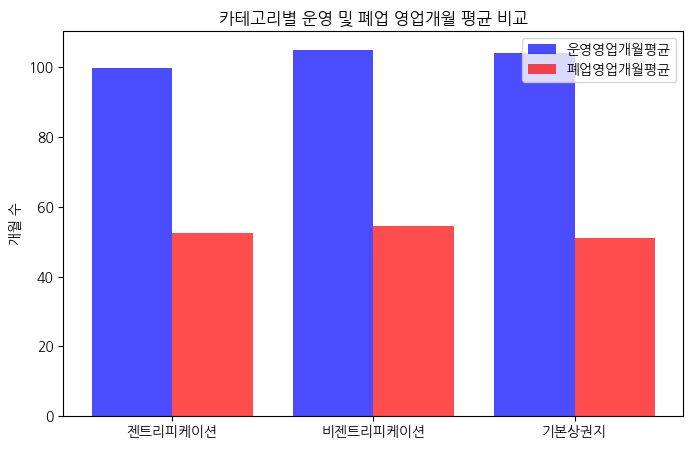

In [17]:
categories = ['젠트리피케이션', '비젠트리피케이션', '기본상권지']
운영평균 = [99.76, 104.99, 103.97]
폐업평균 = [52.38, 54.60, 50.96]

fig, ax = plt.subplots(figsize=(8, 5))
x = range(len(categories))

ax.bar(x, 운영평균, width=0.4, label='운영영업개월평균', color='blue', alpha=0.7)
ax.bar([i + 0.4 for i in x], 폐업평균, width=0.4, label='폐업영업개월평균', color='red', alpha=0.7)

ax.set_xticks([i + 0.2 for i in x])
ax.set_xticklabels(categories)
ax.set_ylabel("개월 수")
ax.set_title("카테고리별 운영 및 폐업 영업개월 평균 비교")
ax.legend()

plt.show()

## 영업개월 평균분포 분석
- 젠트리피케이션 지역의 운영 개월 수 분포가 다른 지역보다 낮은 범위에 있음.
- 비젠트리피케이션 지역은 전체적으로 높은 운영 개월 수를 보임.

즉, 젠트리피케이션 지역은 업장이 짧은 주기로 바뀌고, 비젠트리피케이션 지역은 안정적인 업장이 많음.

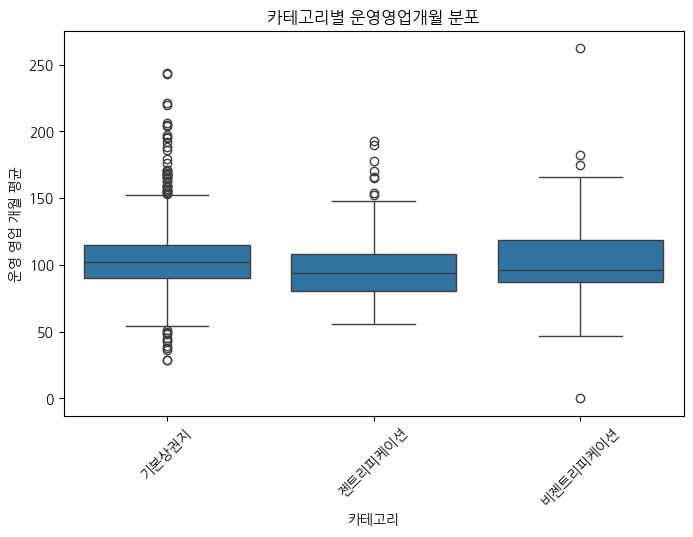

In [18]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df_상권['카테고리'], y=df_상권['운영영업개월평균'])
plt.title("카테고리별 운영영업개월 분포")
plt.ylabel("운영 영업 개월 평균")
plt.xlabel("카테고리")
plt.xticks(rotation=45)
plt.show()


## 폐업 영업 개월 수 분포 분석 (젠트리, 비젠트리 df로)

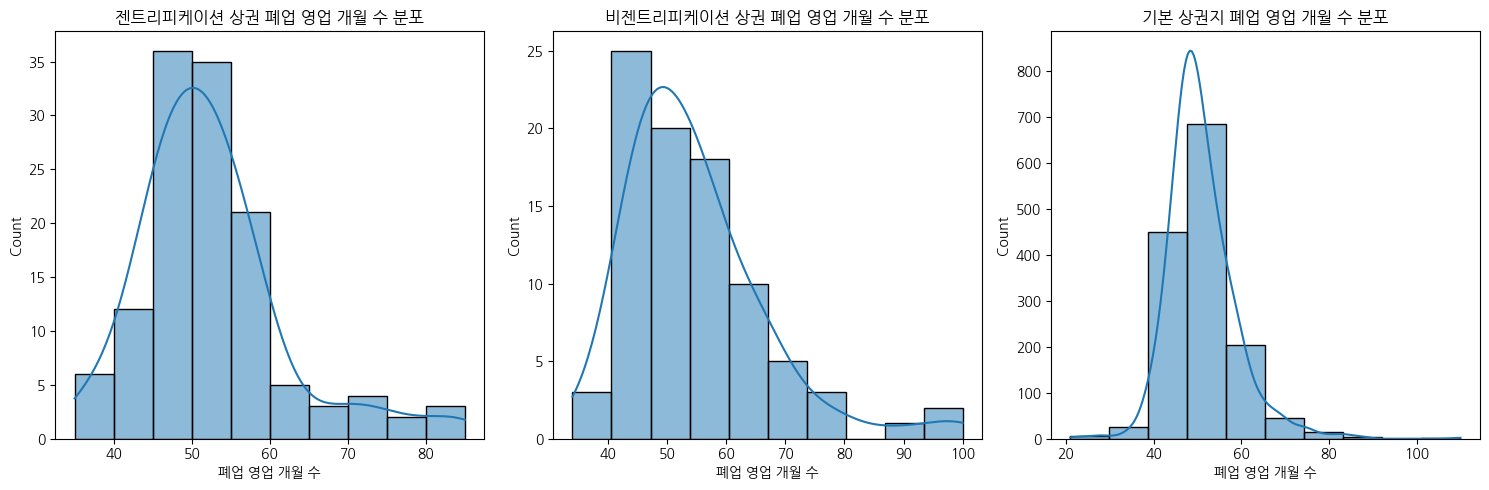

In [19]:
dataframes = [df_카테고리_젠트리피케이션, df_카테고리_비젠트리피케이션, df_카테고리_기본상권지]
titles = ["젠트리피케이션 상권", "비젠트리피케이션 상권", "기본 상권지"]

plt.figure(figsize=(15, 5))

for i, (df, title) in enumerate(zip(dataframes, titles)):
    plt.subplot(1, 3, i+1)
    sns.histplot(df["폐업영업개월평균"], kde=True, bins=10)
    plt.title(f"{title} 폐업 영업 개월 수 분포")
    plt.xlabel("폐업 영업 개월 수")
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

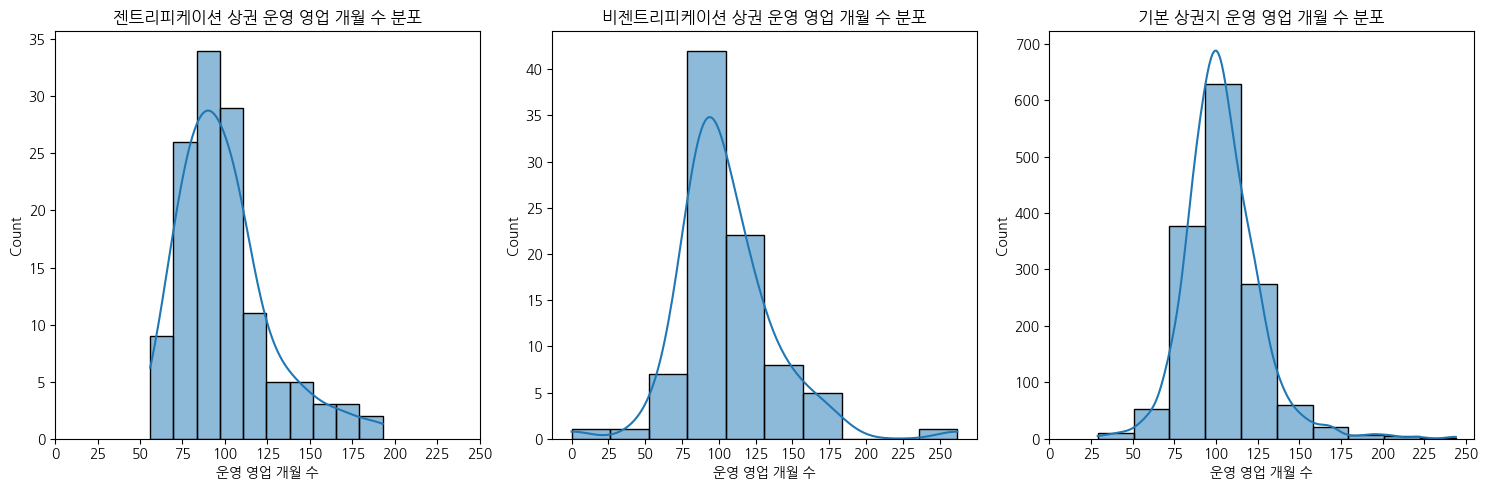

In [20]:
plt.figure(figsize=(15, 5))

for i, (df, title) in enumerate(zip(dataframes, titles)):
    plt.subplot(1, 3, i+1)
    sns.histplot(df["운영영업개월평균"], kde=True, bins=10)
    plt.title(f"{title} 운영 영업 개월 수 분포")
    plt.xticks(range(0, 251, 25))
    plt.xlabel("운영 영업 개월 수")
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

### 결론

젠트리피케이션 지역은 상권 변동성이 크다.

- 운영 개월 수가 낮고, 폐업 개월 수도 낮아 짧은 기간 운영 후 폐업하는 경우가 많음.
- 이는 임대료 상승, 소비 패턴 변화 등의 영향을 받을 가능성이 큼.

비젠트리피케이션 지역은 상대적으로 안정적이다.

- 운영 개월 수도 길고, 폐업 개월 수도 길어 오래 유지되다가 문을 닫는 경향.
- 즉, 자연스러운 비즈니스 사이클에 의해 폐업하는 경우가 많음.

기본상권지는 중간 성향을 보인다.

- 운영/폐업 개월 수가 서울 평균과 비슷하며, 큰 변동성이 없는 일반적인 상권으로 볼 수 있음.

## 상권지표명의 분포 분석

상권변화지표명	의미

- 다이나믹: 점포의 유입과 유출이 빈번하게 발생하는 상권 (변동성 높음)

- 상권확장: 상권의 규모가 커지고, 새로운 점포들이 지속적으로 유입되는 상태

- 상권축소: 기존 점포들이 사라지고, 새로운 점포가 적게 들어오면서 상권이 축소되는 상태

- 정체: 큰 변화 없이 기존 상권이 유지되는 상태

----------

1. 기본상권지는 전반적으로 상권이 크고 안정적.
- 기본상권지에서는 정체(434개)와 다이나믹(457개)이 매우 많음.
  - 즉, 기본상권지는 변화가 적거나, 변화하더라도 활발한 순환이 이루어지는 편.
- 상권확장(210개)과 상권축소(335개)도 많음.
  - 즉, 기본상권지에서는 확장과 축소가 공존하지만, 비교적 지속성이 있음.

2. 젠트리피케이션 지역은 변화가 심하고 불안정
- 다이나믹 비율이 비젠트리피케이션보다 2배 가까이 많음 (43개 vs. 23개).
  - 젠트리피케이션 지역에서는 상권이 급변하는 경향이 있음.
  - 젠트리 현상으로 인해 빠르게 변하고 있는 상권이 많을 가능성이 큼.
- 상권확장(25개)보다 상권축소(13개)가 적긴 하지만, 차이가 크지 않음.
  - 젠트리피케이션 지역에서 확장과 축소가 반복적으로 일어나면서 상권이 불안정한 상태.

3. 비젠트리피케이션 지역은 가장 안정적
- 모든 상권변화지표명의 개수가 적고 균형이 맞춰져 있음.
  - 비젠트리피케이션 지역은 상권 변동이 가장 적은 지역이라고 볼 수 있음.
- 상권축소(10개)와 상권확장(19개)의 차이가 크지 않음.
  - 즉, 크게 성장하는 지역도, 크게 쇠퇴하는 지역도 적음.
- 정체(35개)가 가장 많은 비율.
  - 가장 변화가 없는 안정적인 지역.

In [21]:
젠트리_지표 = df_카테고리_젠트리피케이션['상권변화지표명'].value_counts()
비젠트리_지표 = df_카테고리_비젠트리피케이션['상권변화지표명'].value_counts()
기본상권_지표 = df_카테고리_기본상권지['상권변화지표명'].value_counts()

# 데이터프레임으로 변환
df_지표비교 = pd.DataFrame({
    '젠트리피케이션': 젠트리_지표,
    '비젠트리피케이션': 비젠트리_지표,
    '기본상권지': 기본상권_지표
})

df_지표비교

,젠트리피케이션,비젠트리피케이션,기본상권지
상권변화지표명,,,
다이나믹,43,23,457
상권축소,13,10,335
상권확장,25,19,210
정체,46,35,434


<Figure size 1000x600 with 0 Axes>

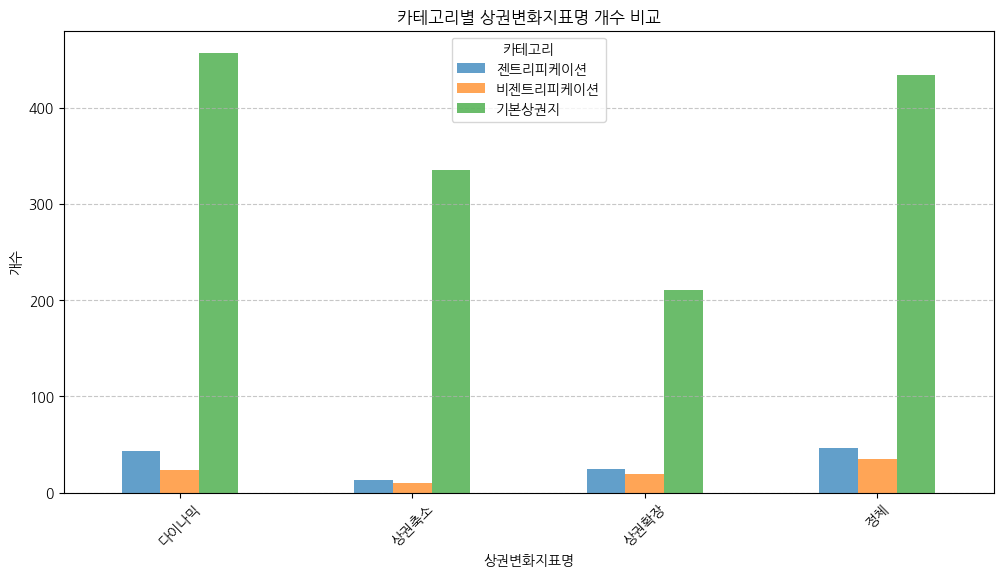

In [22]:
plt.figure(figsize=(10,6))
df_지표비교.plot(kind='bar', figsize=(12,6), alpha=0.7)
plt.title("카테고리별 상권변화지표명 개수 비교")
plt.xlabel("상권변화지표명")
plt.ylabel("개수")
plt.xticks(rotation=45)
plt.legend(title="카테고리")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 상권(주소명별) 데이터 분석

In [23]:
df_주소명_강남역

,기준년분기코드,상권구분코드,상권구분코드명,상권코드,상권코드명,상권변화지표,상권변화지표명,운영영업개월평균,폐업영업개월평균,서울운영영업개월평균,서울폐업영업개월평균,주소명,카테고리
0,20191,D,발달상권,3120187,신논현역,LL,다이나믹,80,42,93,48,강남역,비젠트리피케이션
1,20191,D,발달상권,3120189,강남역,LL,다이나믹,80,46,93,48,강남역,비젠트리피케이션
2,20191,D,발달상권,3120197,역삼역,LL,다이나믹,79,44,93,48,강남역,비젠트리피케이션
3,20193,A,골목상권,3110954,국기원,LL,다이나믹,47,34,92,48,강남역,비젠트리피케이션


## 기본통계분석

젠트리피케이션 지역 vs 비젠트리피케이션 지역 비교 분석

---

1. 운영 개월 수 비교  

젠트리피케이션 지역  
- 운영 개월 수 평균이 대체로 높거나 변동성이 큼.  
- 종로3가 (151.8개월), 명동 (121.2개월), 대학로(혜화역) (105.1개월) 등은 운영 개월 수가 높음.  
- 하지만 홍대입구역 (74.4개월), 신사동 가로수길 (80.2개월), 성수동 (80.4개월) 등 일부 지역은 운영 기간이 짧음.  
- 운영 개월 수 편차가 커서, 오래 유지되는 곳과 빠르게 바뀌는 곳이 혼재되어 있음.  

비젠트리피케이션 지역  
- 운영 개월 수 평균이 상대적으로 낮고, 변동성이 작음.  
- 영등포 (137.6개월), 동대문(DDP) (106.5개월) 등의 몇몇 지역은 운영 기간이 길지만,  
- 강남역 (71.5개월), 건대입구역 (91.4개월), 회기역 (95.1개월) 등은 상대적으로 짧음.  
- 운영 개월 수의 편차가 젠트리피케이션 지역보다 작고, 평균적으로도 더 낮음.  
- 즉, 비젠트리피케이션 지역은 운영 개월 수가 전반적으로 안정적인 편임.  

결론  
- 젠트리피케이션 지역은 오래 지속되는 점포도 있지만, 폐업과 창업이 반복되는 지역도 많아 변동성이 큼.  
- 비젠트리피케이션 지역은 운영 개월 수가 비교적 짧거나 일정하게 유지되는 경향이 있음.  

---

2. 폐업 영업 개월 수 비교  

젠트리피케이션 지역  

- 종로3가 (70.6개월), 명동 (61.1개월) 등은 폐업까지 운영 기간이 길어, 한번 자리 잡으면 오래 유지되는 경향이 있음.  
- 하지만 신사동 가로수길 (46개월), 성수동 (52개월), 송리단길 (45.2개월) 등 일부 지역은 빠르게 교체되는 경향이 있음.  


비젠트리피케이션 지역  

- 영등포 (62.1개월), 동대문(DDP) (64개월) 등 몇몇 지역은 운영 후 폐업까지 기간이 길지만,  
- 강남역 (41.5개월), 건대입구역 (46.1개월), 회기역 (48.6개월) 등은 운영 후 폐업까지 기간이 짧음.  
  
결론

둘의 차이가 유의미하게 있다고 보긴 어려움.

-> 분포나 변동성을 보는게 나을 듯함. (시각화)


In [24]:
주소명_리스트 = [
    "기본", "명동", "신사동_가로수길", "문래", "북촌", "동대문(DDP)", "대학로(혜화역)", "종로3가", "회기역",
    "압구정로데오", "강남역", "송리단길", "여의도역", "영등포", "청담", "용리단길", "신림", "이수역",
    "서촌", "건대입구역", "성수동", "사당", "홍대입구역", "합정", "경리단길", "해방촌(이태원_근처)",
    "잠실역", "연남"
]


for 주소 in 주소명_리스트:
    df_name = f"df_주소명_{주소}"

    if df_name in locals():
        df = locals()[df_name]

        print(f"\n{주소} 상권 분석\n")

        # 주요 지표 통계 요약
        display(df.describe())


기본 상권 분석



,기준년분기코드,상권코드,운영영업개월평균,폐업영업개월평균,서울운영영업개월평균,서울폐업영업개월평균
count,1436.000000,1.436000e+03,1436.000000,1436.000000,1436.000000,1436.000000
mean,20224.365599,3.115089e+06,103.972145,50.961003,99.620474,50.668524
std,23.096662,8.697625e+03,22.463178,7.804752,4.853689,1.841113
min,20191.000000,3.001494e+06,29.000000,21.000000,92.000000,48.000000
25%,20191.000000,3.110396e+06,90.000000,46.000000,93.000000,48.000000
50%,20241.000000,3.110768e+06,102.000000,50.000000,103.000000,52.000000
75%,20241.000000,3.120115e+06,115.000000,55.000000,103.000000,52.000000
max,20243.000000,3.130326e+06,244.000000,110.000000,107.000000,52.000000



명동 상권 분석



,기준년분기코드,상권코드,운영영업개월평균,폐업영업개월평균,서울운영영업개월평균,서울폐업영업개월평균
count,10.000000,1.000000e+01,10.00000,10.000000,10.000000,10.000000
mean,20210.000000,3.105178e+06,121.20000,61.100000,96.300000,49.400000
std,23.309512,3.673468e+04,19.35516,9.230986,4.808557,1.897367
min,20191.000000,3.001492e+06,93.00000,53.000000,92.000000,48.000000
25%,20191.000000,3.110040e+06,104.00000,54.250000,93.000000,48.000000
50%,20196.000000,3.120026e+06,123.00000,58.000000,93.000000,48.000000
75%,20236.000000,3.120029e+06,134.50000,66.500000,101.500000,51.500000
max,20241.000000,3.120032e+06,152.00000,79.000000,103.000000,52.000000



신사동_가로수길 상권 분석



,기준년분기코드,상권코드,운영영업개월평균,폐업영업개월평균,서울운영영업개월평균,서울폐업영업개월평균
count,7.000000,7.000000e+00,7.000000,7.000000,7.000000,7.000000
mean,20198.714286,3.117673e+06,80.285714,46.000000,94.142857,48.571429
std,18.670068,7.233867e+03,8.280787,6.271629,3.933979,1.511858
min,20191.000000,3.110949e+06,66.000000,37.000000,92.000000,48.000000
25%,20191.000000,3.110952e+06,77.000000,44.000000,92.500000,48.000000
50%,20191.000000,3.120178e+06,79.000000,46.000000,93.000000,48.000000
75%,20193.000000,3.120188e+06,86.000000,46.500000,93.000000,48.000000
max,20241.000000,3.130302e+06,91.000000,58.000000,103.000000,52.000000



문래 상권 분석



,기준년분기코드,상권코드,운영영업개월평균,폐업영업개월평균,서울운영영업개월평균,서울폐업영업개월평균
count,9.000000,9.000000e+00,9.000000,9.000000,9.000000,9.000000
mean,20208.888889,3.120382e+06,99.222222,49.555556,96.222222,49.444444
std,24.343605,8.436770e+03,21.608897,6.366143,5.093569,1.943651
min,20191.000000,3.110759e+06,73.000000,35.000000,92.000000,48.000000
25%,20191.000000,3.110770e+06,87.000000,49.000000,93.000000,48.000000
50%,20191.000000,3.120140e+06,106.000000,50.000000,93.000000,48.000000
75%,20241.000000,3.130240e+06,108.000000,52.000000,103.000000,52.000000
max,20241.000000,3.130246e+06,141.000000,57.000000,103.000000,52.000000



북촌 상권 분석



,기준년분기코드,상권코드,운영영업개월평균,폐업영업개월평균,서울운영영업개월평균,서울폐업영업개월평균
count,6.000000,6.000000e+00,6.000000,6.000000,6.000000,6.000000
mean,20199.666667,3.116677e+06,98.333333,55.666667,95.333333,48.666667
std,21.228911,5.158685e+03,23.114209,5.163978,5.715476,1.632993
min,20191.000000,3.110017e+06,75.000000,48.000000,93.000000,48.000000
25%,20191.000000,3.112515e+06,81.500000,53.250000,93.000000,48.000000
50%,20191.000000,3.120006e+06,91.500000,56.000000,93.000000,48.000000
75%,20191.000000,3.120008e+06,114.250000,58.000000,93.000000,48.000000
max,20243.000000,3.120009e+06,132.000000,63.000000,107.000000,52.000000



동대문(DDP) 상권 분석



,기준년분기코드,상권코드,운영영업개월평균,폐업영업개월평균,서울운영영업개월평균,서울폐업영업개월평균
count,23.000000,2.300000e+01,23.000000,23.000000,23.000000,23.000000
mean,20211.478261,3.120104e+06,106.565217,64.086957,97.000000,49.608696
std,24.583567,2.684581e+04,30.777539,10.702222,4.935953,1.971136
min,20191.000000,3.001493e+06,0.000000,50.000000,93.000000,48.000000
25%,20191.000000,3.120026e+06,96.000000,56.500000,93.000000,48.000000
50%,20191.000000,3.130014e+06,112.000000,62.000000,93.000000,48.000000
75%,20241.000000,3.130028e+06,123.500000,67.500000,103.000000,52.000000
max,20241.000000,3.130327e+06,149.000000,97.000000,103.000000,52.000000



대학로(혜화역) 상권 분석



,기준년분기코드,상권코드,운영영업개월평균,폐업영업개월평균,서울운영영업개월평균,서울폐업영업개월평균
count,6.000000,6.000000e+00,6.000000,6.000000,6.000000,6.000000
mean,20232.666667,3.111689e+06,105.166667,53.666667,101.333333,51.333333
std,20.412415,4.077340e+03,14.414113,4.718757,4.082483,1.632993
min,20191.000000,3.110021e+06,85.000000,47.000000,93.000000,48.000000
25%,20241.000000,3.110023e+06,94.250000,51.500000,103.000000,52.000000
50%,20241.000000,3.110026e+06,110.000000,53.500000,103.000000,52.000000
75%,20241.000000,3.110028e+06,115.250000,55.500000,103.000000,52.000000
max,20241.000000,3.120012e+06,120.000000,61.000000,103.000000,52.000000



종로3가 상권 분석



,기준년분기코드,상권코드,운영영업개월평균,폐업영업개월평균,서울운영영업개월평균,서울폐업영업개월평균
count,12.000000,1.200000e+01,12.000000,12.000000,12.000000,12.000000
mean,20209.500000,3.125023e+06,151.833333,70.666667,96.750000,49.416667
std,24.303011,5.223563e+03,29.841500,10.421423,5.462683,1.928652
min,20191.000000,3.120010e+06,110.000000,54.000000,93.000000,48.000000
25%,20191.000000,3.120027e+06,122.750000,60.750000,93.000000,48.000000
50%,20191.000000,3.125020e+06,159.500000,71.000000,93.000000,48.000000
75%,20241.000000,3.130032e+06,172.000000,78.500000,103.000000,52.000000
max,20243.000000,3.130036e+06,193.000000,85.000000,107.000000,52.000000



회기역 상권 분석



,기준년분기코드,상권코드,운영영업개월평균,폐업영업개월평균,서울운영영업개월평균,서울폐업영업개월평균
count,11.000000,1.100000e+01,11.000000,11.000000,11.000000,11.000000
mean,20227.363636,3.113813e+06,95.181818,48.636364,100.272727,50.909091
std,23.354968,6.685704e+03,14.358400,5.352994,4.670994,1.868397
min,20191.000000,3.110205e+06,61.000000,43.000000,93.000000,48.000000
25%,20216.000000,3.110212e+06,92.500000,44.500000,98.000000,50.000000
50%,20241.000000,3.110219e+06,96.000000,47.000000,103.000000,52.000000
75%,20241.000000,3.115143e+06,106.500000,51.500000,103.000000,52.000000
max,20241.000000,3.130098e+06,110.000000,61.000000,103.000000,52.000000



압구정로데오 상권 분석



,기준년분기코드,상권코드,운영영업개월평균,폐업영업개월평균,서울운영영업개월평균,서울폐업영업개월평균
count,7.0,7.000000e+00,7.000000,7.000000,7.0,7.0
mean,20191.0,3.117557e+06,95.000000,46.285714,93.0,48.0
std,0.0,4.506270e+03,11.090537,5.794086,0.0,0.0
min,20191.0,3.110959e+06,84.000000,38.000000,93.0,48.0
25%,20191.0,3.115575e+06,91.000000,44.000000,93.0,48.0
50%,20191.0,3.120193e+06,93.000000,46.000000,93.0,48.0
75%,20191.0,3.120198e+06,93.500000,47.500000,93.0,48.0
max,20191.0,3.120202e+06,119.000000,57.000000,93.0,48.0



강남역 상권 분석



,기준년분기코드,상권코드,운영영업개월평균,폐업영업개월평균,서울운영영업개월평균,서울폐업영업개월평균
count,4.0,4.000000e+00,4.000000,4.000000,4.00,4.0
mean,20191.5,3.117882e+06,71.500000,41.500000,92.75,48.0
std,1.0,4.618502e+03,16.340135,5.259911,0.50,0.0
min,20191.0,3.110954e+06,47.000000,34.000000,92.00,48.0
25%,20191.0,3.117879e+06,71.000000,40.000000,92.75,48.0
50%,20191.0,3.120188e+06,79.500000,43.000000,93.00,48.0
75%,20191.5,3.120191e+06,80.000000,44.500000,93.00,48.0
max,20193.0,3.120197e+06,80.000000,46.000000,93.00,48.0



송리단길 상권 분석



,기준년분기코드,상권코드,운영영업개월평균,폐업영업개월평균,서울운영영업개월평균,서울폐업영업개월평균
count,7.000000,7.000000e+00,7.000000,7.000000,7.000000,7.000000
mean,20212.428571,3.114963e+06,91.571429,45.285714,97.285714,49.714286
std,26.726124,4.926961e+03,11.043205,1.603567,5.345225,2.138090
min,20191.000000,3.111010e+06,75.000000,44.000000,93.000000,48.000000
25%,20191.000000,3.111012e+06,84.000000,44.000000,93.000000,48.000000
50%,20191.000000,3.111015e+06,95.000000,45.000000,93.000000,48.000000
75%,20241.000000,3.120229e+06,98.000000,46.000000,103.000000,52.000000
max,20241.000000,3.120232e+06,107.000000,48.000000,103.000000,52.000000



여의도역 상권 분석



,기준년분기코드,상권코드,운영영업개월평균,폐업영업개월평균,서울운영영업개월평균,서울폐업영업개월평균
count,1.0,1.0,1.0,1.0,1.0,1.0
mean,20191.0,3120149.0,103.0,48.0,93.0,48.0
std,NaN,NaN,NaN,NaN,NaN,NaN
min,20191.0,3120149.0,103.0,48.0,93.0,48.0
25%,20191.0,3120149.0,103.0,48.0,93.0,48.0
50%,20191.0,3120149.0,103.0,48.0,93.0,48.0
75%,20191.0,3120149.0,103.0,48.0,93.0,48.0
max,20191.0,3120149.0,103.0,48.0,93.0,48.0



영등포 상권 분석



,기준년분기코드,상권코드,운영영업개월평균,폐업영업개월평균,서울운영영업개월평균,서울폐업영업개월평균
count,17.000000,1.700000e+01,17.000000,17.000000,17.000000,17.000000
mean,20216.941176,3.119906e+06,137.647059,62.176471,97.882353,50.000000
std,24.239613,9.399618e+03,44.832942,13.440774,4.998529,1.968502
min,20191.000000,3.110777e+06,79.000000,50.000000,93.000000,48.000000
25%,20191.000000,3.110799e+06,111.000000,54.000000,93.000000,48.000000
50%,20212.000000,3.120145e+06,132.000000,57.000000,95.000000,49.000000
75%,20241.000000,3.130250e+06,165.000000,65.000000,103.000000,52.000000
max,20241.000000,3.130257e+06,262.000000,100.000000,103.000000,52.000000



청담 상권 분석



,기준년분기코드,상권코드,운영영업개월평균,폐업영업개월평균,서울운영영업개월평균,서울폐업영업개월평균
count,6.000000,6.000000e+00,6.000000,6.000000,6.000000,6.000000
mean,20212.833333,3.114058e+06,85.166667,47.333333,97.333333,49.666667
std,25.063253,4.765966e+03,12.205190,5.921711,5.428321,1.966384
min,20191.000000,3.110976e+06,66.000000,38.000000,93.000000,48.000000
25%,20191.000000,3.110980e+06,80.250000,44.250000,93.000000,48.000000
50%,20206.000000,3.110986e+06,85.000000,48.500000,95.000000,49.000000
75%,20236.000000,3.117903e+06,93.500000,51.250000,101.500000,51.500000
max,20242.000000,3.120214e+06,100.000000,54.000000,105.000000,52.000000



용리단길 상권 분석



,기준년분기코드,상권코드,운영영업개월평균,폐업영업개월평균,서울운영영업개월평균,서울폐업영업개월평균
count,3.000000,3.000000e+00,3.000000,3.000000,3.000000,3.000000
mean,20207.666667,3.116719e+06,99.333333,52.666667,96.333333,49.333333
std,28.867513,5.755894e+03,6.506407,3.055050,5.773503,2.309401
min,20191.000000,3.110073e+06,93.000000,50.000000,93.000000,48.000000
25%,20191.000000,3.115057e+06,96.000000,51.000000,93.000000,48.000000
50%,20191.000000,3.120041e+06,99.000000,52.000000,93.000000,48.000000
75%,20216.000000,3.120042e+06,102.500000,54.000000,98.000000,50.000000
max,20241.000000,3.120044e+06,106.000000,56.000000,103.000000,52.000000



신림 상권 분석



,기준년분기코드,상권코드,운영영업개월평균,폐업영업개월평균,서울운영영업개월평균,서울폐업영업개월평균
count,13.000000,1.300000e+01,13.000000,13.000000,13.000000,13.000000
mean,20207.384615,3.116067e+06,97.000000,46.769231,95.923077,49.307692
std,23.478850,8.494130e+03,21.679483,5.356520,4.923778,1.887883
min,20191.000000,3.110867e+06,61.000000,38.000000,92.000000,48.000000
25%,20191.000000,3.110871e+06,86.000000,44.000000,93.000000,48.000000
50%,20192.000000,3.110877e+06,93.000000,46.000000,93.000000,48.000000
75%,20241.000000,3.120157e+06,106.000000,49.000000,103.000000,52.000000
max,20241.000000,3.130285e+06,147.000000,56.000000,103.000000,52.000000



이수역 상권 분석



,기준년분기코드,상권코드,운영영업개월평균,폐업영업개월평균,서울운영영업개월평균,서울폐업영업개월평균
count,9.000000,9.000000e+00,9.000000,9.000000,9.000000,9.000000
mean,20213.555556,3.114061e+06,95.777778,49.666667,97.333333,49.888889
std,26.043767,6.810789e+03,11.734328,3.354102,5.385165,2.027588
min,20191.000000,3.110848e+06,73.000000,45.000000,92.000000,48.000000
25%,20191.000000,3.110851e+06,89.000000,47.000000,93.000000,48.000000
50%,20193.000000,3.110904e+06,100.000000,51.000000,93.000000,49.000000
75%,20241.000000,3.110907e+06,104.000000,52.000000,103.000000,52.000000
max,20241.000000,3.130273e+06,108.000000,54.000000,103.000000,52.000000



서촌 상권 분석



,기준년분기코드,상권코드,운영영업개월평균,폐업영업개월평균,서울운영영업개월평균,서울폐업영업개월평균
count,8.000000,8.000000e+00,8.000000,8.000000,8.000000,8.00000
mean,20216.750000,3.117507e+06,100.375000,52.250000,99.250000,50.12500
std,27.269816,8.859057e+03,26.494946,6.430952,6.798109,2.03101
min,20191.000000,3.110008e+06,60.000000,39.000000,93.000000,48.00000
25%,20191.000000,3.110013e+06,88.250000,50.500000,93.000000,48.00000
50%,20216.500000,3.115008e+06,98.000000,52.500000,98.000000,50.50000
75%,20242.250000,3.122502e+06,110.500000,57.250000,105.500000,52.00000
max,20243.000000,3.130002e+06,148.000000,59.000000,107.000000,52.00000



건대입구역 상권 분석



,기준년분기코드,상권코드,운영영업개월평균,폐업영업개월평균,서울운영영업개월평균,서울폐업영업개월평균
count,9.000000,9.000000e+00,9.000000,9.000000,9.000000,9.000000
mean,20208.777778,3.122318e+06,91.444444,46.111111,96.222222,49.333333
std,24.381231,9.688573e+03,15.000926,1.452966,5.093569,2.000000
min,20191.000000,3.110140e+06,71.000000,44.000000,92.000000,48.000000
25%,20191.000000,3.110142e+06,86.000000,45.000000,93.000000,48.000000
50%,20191.000000,3.130074e+06,93.000000,46.000000,93.000000,48.000000
75%,20241.000000,3.130077e+06,95.000000,47.000000,103.000000,52.000000
max,20241.000000,3.130079e+06,124.000000,49.000000,103.000000,52.000000



성수동 상권 분석



,기준년분기코드,상권코드,운영영업개월평균,폐업영업개월평균,서울운영영업개월평균,서울폐업영업개월평균
count,7.000000,7.000000e+00,7.000000,7.000000,7.000000,7.000000
mean,20221.000000,3.115816e+06,80.428571,52.000000,98.571429,50.285714
std,25.166115,7.833948e+03,13.476611,3.316625,5.533448,2.138090
min,20191.000000,3.110131e+06,70.000000,47.000000,92.000000,48.000000
25%,20196.000000,3.110134e+06,71.500000,50.000000,93.000000,48.000000
50%,20241.000000,3.110137e+06,75.000000,52.000000,103.000000,52.000000
75%,20241.000000,3.120052e+06,83.500000,54.500000,103.000000,52.000000
max,20241.000000,3.130071e+06,108.000000,56.000000,103.000000,52.000000



사당 상권 분석



,기준년분기코드,상권코드,운영영업개월평균,폐업영업개월평균,서울운영영업개월평균,서울폐업영업개월평균
count,7.000000,7.000000e+00,7.000000,7.000000,7.000000,7.000000
mean,20222.571429,3.116310e+06,106.714286,48.714286,99.000000,50.428571
std,24.026771,7.549793e+03,32.678812,5.089672,5.033223,1.988060
min,20191.000000,3.110850e+06,77.000000,42.000000,93.000000,48.000000
25%,20201.500000,3.110906e+06,87.500000,45.000000,94.000000,48.500000
50%,20241.000000,3.110913e+06,90.000000,50.000000,103.000000,52.000000
75%,20241.000000,3.120162e+06,121.500000,51.500000,103.000000,52.000000
max,20241.000000,3.130274e+06,162.000000,56.000000,103.000000,52.000000



홍대입구역 상권 분석



,기준년분기코드,상권코드,운영영업개월평균,폐업영업개월평균,서울운영영업개월평균,서울폐업영업개월평균
count,12.000000,1.200000e+01,12.000000,12.000000,12.000000,12.000000
mean,20224.416667,3.117850e+06,74.416667,43.916667,99.666667,50.750000
std,24.496598,8.482162e+03,12.383701,5.484828,4.923660,1.864745
min,20191.000000,3.110509e+06,56.000000,35.000000,93.000000,48.000000
25%,20191.750000,3.110564e+06,65.500000,41.750000,93.000000,48.750000
50%,20241.000000,3.115334e+06,73.000000,43.500000,103.000000,52.000000
75%,20241.000000,3.122625e+06,82.250000,47.000000,103.000000,52.000000
max,20241.000000,3.130191e+06,96.000000,56.000000,103.000000,52.000000



합정 상권 분석



,기준년분기코드,상권코드,운영영업개월평균,폐업영업개월평균,서울운영영업개월평균,서울폐업영업개월평균
count,6.000000,6.000000e+00,6.000000,6.000000,6.000000,6.000000
mean,20217.833333,3.118690e+06,84.500000,49.333333,97.833333,50.166667
std,25.693709,9.642893e+03,16.269604,2.160247,5.671567,2.041241
min,20191.000000,3.110550e+06,70.000000,46.000000,92.000000,48.000000
25%,20193.750000,3.110556e+06,71.500000,48.250000,93.000000,48.250000
50%,20221.500000,3.115330e+06,79.000000,49.500000,98.000000,50.500000
75%,20241.000000,3.127666e+06,96.250000,50.750000,103.000000,52.000000
max,20241.000000,3.130188e+06,108.000000,52.000000,103.000000,52.000000



경리단길 상권 분석



,기준년분기코드,상권코드,운영영업개월평균,폐업영업개월평균,서울운영영업개월평균,서울폐업영업개월평균
count,3.000000,3.000000e+00,3.000000,3.000000,3.000000,3.000000
mean,20207.666667,3.077208e+06,97.333333,56.666667,96.333333,49.333333
std,28.867513,6.576139e+04,9.814955,1.154701,5.773503,2.309401
min,20191.000000,3.001491e+06,86.000000,56.000000,93.000000,48.000000
25%,20191.000000,3.055788e+06,94.500000,56.000000,93.000000,48.000000
50%,20191.000000,3.110086e+06,103.000000,56.000000,93.000000,48.000000
75%,20216.000000,3.115066e+06,103.000000,57.000000,98.000000,50.000000
max,20241.000000,3.120046e+06,103.000000,58.000000,103.000000,52.000000



해방촌(이태원_근처) 상권 분석



,기준년분기코드,상권코드,운영영업개월평균,폐업영업개월평균,서울운영영업개월평균,서울폐업영업개월평균
count,5.00000,5.000000e+00,5.000000,5.000000,5.000000,5.000000
mean,20231.00000,3.114078e+06,87.200000,48.800000,101.000000,51.200000
std,22.36068,8.934210e+03,12.517987,2.863564,4.472136,1.788854
min,20191.00000,3.110080e+06,69.000000,44.000000,93.000000,48.000000
25%,20241.00000,3.110081e+06,85.000000,49.000000,103.000000,52.000000
50%,20241.00000,3.110084e+06,88.000000,49.000000,103.000000,52.000000
75%,20241.00000,3.110085e+06,90.000000,51.000000,103.000000,52.000000
max,20241.00000,3.130060e+06,104.000000,51.000000,103.000000,52.000000



잠실역 상권 분석



,기준년분기코드,상권코드,운영영업개월평균,폐업영업개월평균,서울운영영업개월평균,서울폐업영업개월평균
count,2.000000,2.000000e+00,2.000000,2.000000,2.000000,2.00000
mean,20213.500000,3.060861e+06,80.500000,53.000000,97.000000,49.50000
std,28.991378,8.395620e+04,9.192388,4.242641,7.071068,2.12132
min,20193.000000,3.001495e+06,74.000000,50.000000,92.000000,48.00000
25%,20203.250000,3.031178e+06,77.250000,51.500000,94.500000,48.75000
50%,20213.500000,3.060861e+06,80.500000,53.000000,97.000000,49.50000
75%,20223.750000,3.090544e+06,83.750000,54.500000,99.500000,50.25000
max,20234.000000,3.120227e+06,87.000000,56.000000,102.000000,51.00000



연남 상권 분석



,기준년분기코드,상권코드,운영영업개월평균,폐업영업개월평균,서울운영영업개월평균,서울폐업영업개월평균
count,4.0,4.000000e+00,4.000000,4.000000,4.0,4.0
mean,20241.0,3.115439e+06,101.000000,55.000000,103.0,52.0
std,0.0,9.835200e+03,19.442222,6.928203,0.0,0.0
min,20241.0,3.110501e+06,80.000000,49.000000,103.0,52.0
25%,20241.0,3.110505e+06,88.250000,52.000000,103.0,52.0
50%,20241.0,3.110532e+06,100.000000,53.000000,103.0,52.0
75%,20241.0,3.115466e+06,112.750000,56.000000,103.0,52.0
max,20241.0,3.130192e+06,124.000000,65.000000,103.0,52.0


## 운영 개월 수가 가장 오래 유지되는 지역 vs. 가장 짧게 유지되는 지역 비교 분석

운영 개월 수가 가장 오래 유지되는 지역 (TOP 10)

  - 운영 개월 수가 가장 길게 유지되는 지역:
    - 종로3가 (약 150개월), 명동 (약 140개월), 영등포 (약 130개월) 등 운영 개월 수가 매우 긴 지역 포함.
    - 사당, 동대문(DDP), 대학로(혜화역), 연남, 서촌, 여의도역 등도 100개월 이상 운영되는 경향.
  
  - 젠트리피케이션 지역: 종로3가, 명동, 대학로(혜화역), 연남, 서촌
  - 비젠트리피케이션 지역: 영등포, 동대문(DDP), 사당, 여의도역

운영 개월 수가 가장 짧게 유지되는 지역 (BOTTOM 10)

  - 운영 개월 수가 가장 짧게 유지되는 지역:
    - 송리단길, 건대입구역, 해방촌(이태원 근처), 청담, 합정, 잠실역, 성수동, 신사동 가로수길, 홍대입구역, 강남역 등이 포함됨.
    - 운영 개월 수가 90개월 이하로 짧으며, 특히 송리단길, 건대입구역, 해방촌(이태원 근처) 등은 약 80개월 내외로 운영됨.
  
  - 젠트리피케이션 지역: 송리단길, 해방촌(이태원 근처), 합정, 성수동, 신사동 가로수길, 홍대입구역
  - 비젠트리피케이션 지역: 건대입구역, 청담, 잠실역, 강남역

------------


젠트리피케이션 지역 vs. 비젠트리피케이션 지역 운영 개월 수 비교

  - 젠트리피케이션 지역
    - 운영 개월 수가 짧은 지역 다수 포함됨.
    - 송리단길, 해방촌(이태원 근처), 합정, 성수동, 신사동 가로수길, 홍대입구역 등 운영 개월 수가 짧음.
    - 일부 예외적으로 운영 개월 수가 긴 지역(예: 종로3가, 명동, 대학로(혜화역))이 있지만, 대체로 운영 개월 수가 짧고 변동성이 큼.

  - 비젠트리피케이션 지역
    - 운영 개월 수가 긴 지역과 짧은 지역이 혼재됨.
    - 운영 개월 수가 긴 지역: 영등포, 동대문(DDP), 사당, 여의도역 등 운영 개월 수가 100개월 이상으로 안정적.
    - 운영 개월 수가 짧은 지역: 강남역, 청담, 잠실역 등은 짧게 유지됨.
    - 상대적으로 운영 개월 수가 일정하게 유지되는 경향이 있지만, 일부 변화가 빠른 지역도 포함됨.

-결론

  - 젠트리피케이션 지역은 운영 개월 수가 짧은 지역이 많으며, 빠른 상권 변화와 창업-폐업이 반복되는 특징을 보임.
  - 종로3가, 명동 등 일부 지역은 오래 유지되지만 전반적으로 운영 개월 수가 짧은 경향이 강함.
  - 비젠트리피케이션 지역은 운영 개월 수가 비교적 안정적인 경향을 보임.
  - 특히 영등포, 동대문(DDP), 여의도역, 사당 등은 운영 개월 수가 길어 안정성이 높음.
  - 하지만 강남역, 청담, 잠실역 등 일부 지역은 운영 개월 수가 짧아 빠르게 변화하는 상권이 혼재됨.


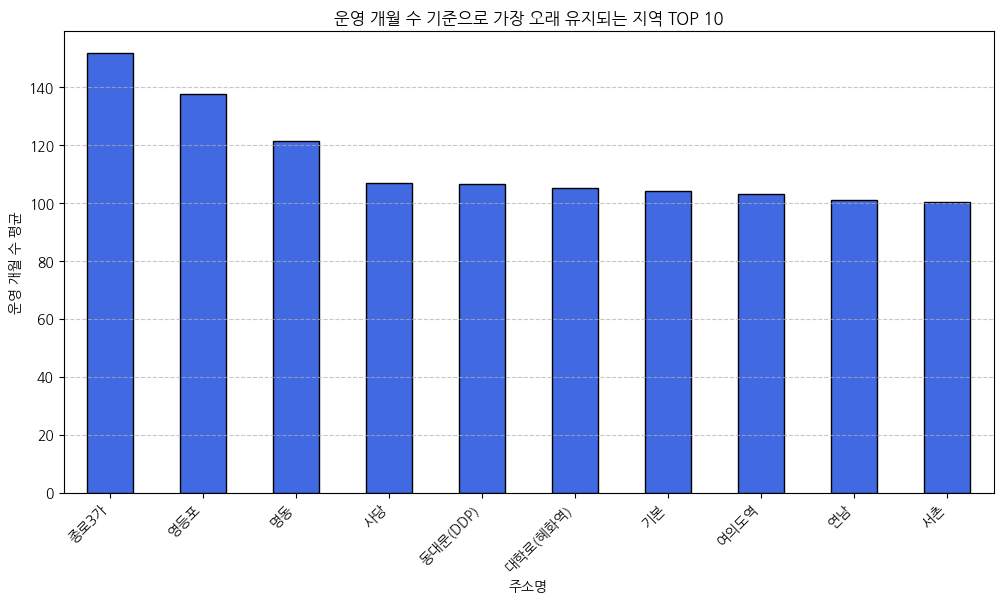

In [25]:
# 운영 개월 수 기준으로 가장 오래 유지되는 지역 TOP 10
top_10_operating = df_상권.groupby("주소명")["운영영업개월평균"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_10_operating.plot(kind='bar', color='royalblue', edgecolor='black')
plt.xlabel("주소명")
plt.ylabel("운영 개월 수 평균")
plt.title("운영 개월 수 기준으로 가장 오래 유지되는 지역 TOP 10")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

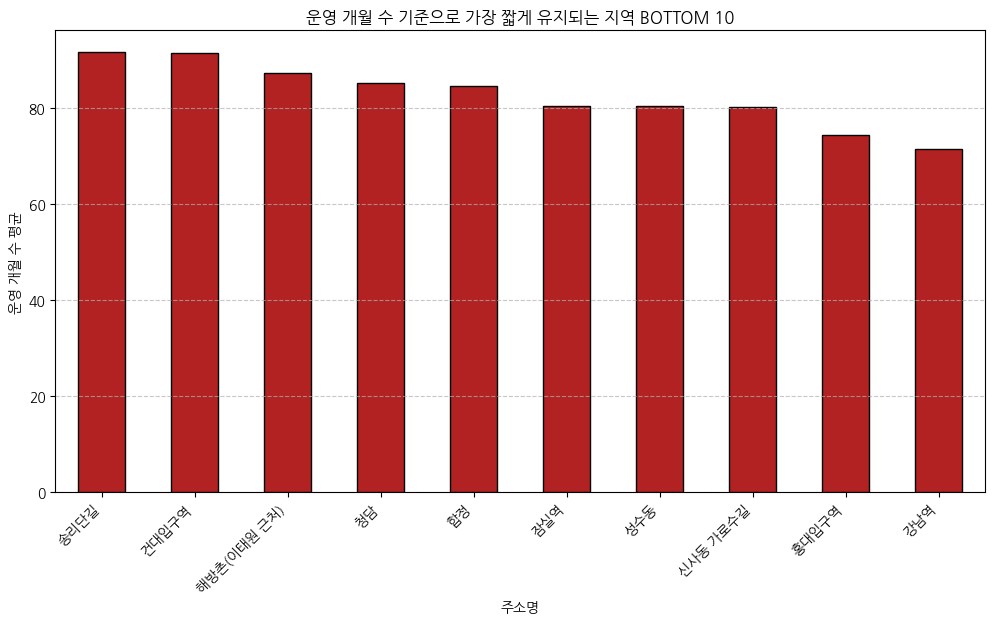

In [26]:
# 운영 개월 수 기준으로 가장 짧게 유지되는 지역 BOTTOM 10
top_10_operating = df_상권.groupby("주소명")["운영영업개월평균"].mean().sort_values(ascending=False).tail(10)

plt.figure(figsize=(12, 6))
top_10_operating.plot(kind='bar', color='firebrick', edgecolor='black')
plt.xlabel("주소명")
plt.ylabel("운영 개월 수 평균")
plt.title("운영 개월 수 기준으로 가장 짧게 유지되는 지역 BOTTOM 10")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 폐업 개월 수가 가장 오래 운영 후 폐업하는 지역 vs. 가장 짧게 운영 후 폐업하는 지역 비교 분석  

폐업 개월 수가 가장 오래 운영 후 폐업하는 지역 (TOP 10)  

  - 폐업 개월 수가 가장 긴 지역:  
    - 종로3가 (약 70개월), 동대문(DDP) (약 65개월), 영등포 (약 63개월)  
    - 명동, 경리단길, 북촌, 연남, 대학로(혜화역), 잠실역, 용리단길 등도 폐업 개월 수가 50개월 이상 유지됨.  

  - 젠트리피케이션 지역: 종로3가, 명동, 경리단길, 북촌, 연남, 대학로(혜화역)  
  - 비젠트리피케이션 지역: 동대문(DDP), 영등포, 잠실역, 용리단길  

폐업 개월 수가 가장 짧게 운영 후 폐업하는 지역 (BOTTOM 10)  

  - 폐업 개월 수가 가장 짧은 지역:  
    - 회기역, 여의도역, 청담, 신림, 압구정로데오, 건대입구역, 신사동 가로수길, 송리단길, 홍대입구역, 강남역  
    - 폐업 개월 수가 약 40~50개월 수준으로, 비교적 빠르게 폐업하는 경향  

  - 젠트리피케이션 지역: 신사동 가로수길, 송리단길, 홍대입구역  
  - 비젠트리피케이션 지역: 회기역, 여의도역, 청담, 신림, 압구정로데오, 건대입구역, 강남역  

--------------


결론  

  - 젠트리피케이션 지역은 폐업 개월 수가 짧은 지역이 많아 빠른 상권 변화와 창업-폐업이 반복되는 특징을 보임.  
  - 그러나 일부 지역(종로3가, 명동, 경리단길 등)은 폐업 개월 수가 길어 예외적인 패턴을 가짐.  
  - 비젠트리피케이션 지역은 폐업 개월 수가 비교적 일정하게 유지되는 경향이 강함.  
  - 특히 영등포, 동대문(DDP) 등은 폐업 개월 수가 길어 안정성이 높음.  
  - 하지만 강남역, 여의도역, 건대입구역 등 일부 지역은 폐업 개월 수가 짧아 젠트리피케이션 지역과 유사한 변동성을 보일 수 있음.  


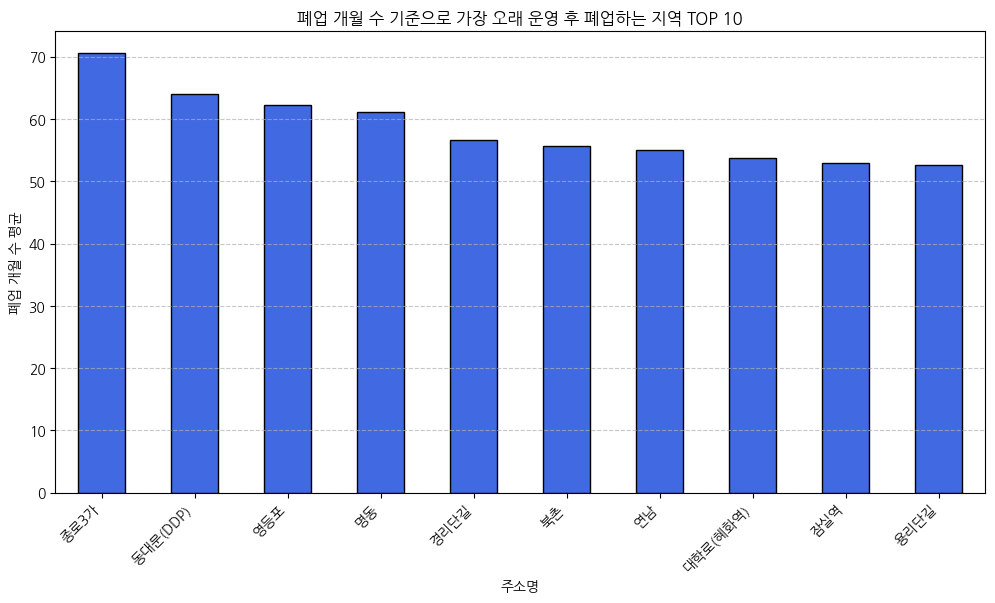

In [27]:
# 폐업 개월 수 기준으로 가장 오래 운영 후 폐업하는 지역 TOP 10
top_10_closing = df_상권.groupby("주소명")["폐업영업개월평균"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_10_closing.plot(kind='bar', color='royalblue', edgecolor='black')
plt.xlabel("주소명")
plt.ylabel("폐업 개월 수 평균")
plt.title("폐업 개월 수 기준으로 가장 오래 운영 후 폐업하는 지역 TOP 10")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

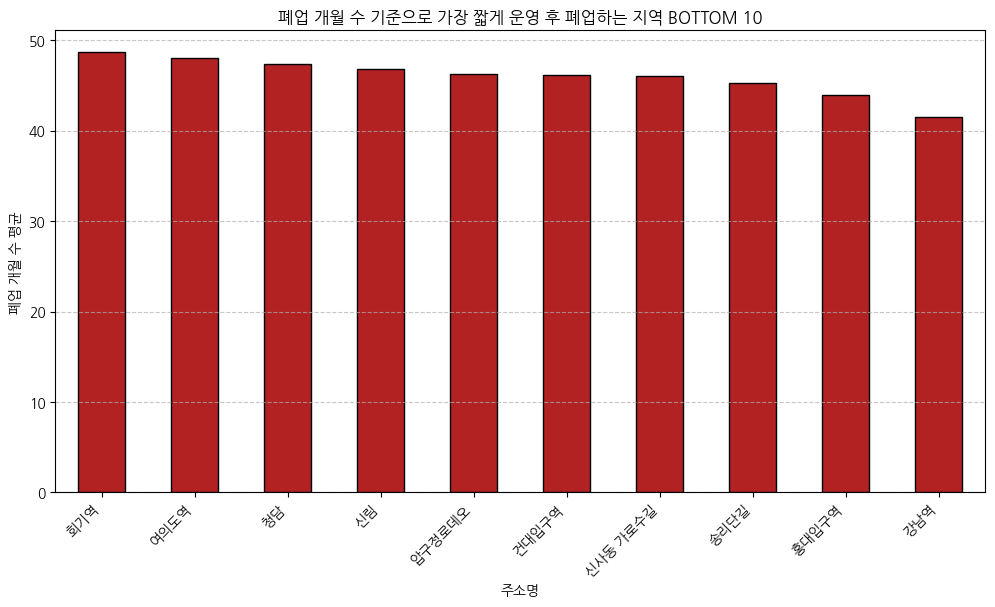

In [28]:
# 폐업 개월 수 기준으로 가장 짧게 운영 후 폐업하는 지역 BOTTOM 10
top_10_closing = df_상권.groupby("주소명")["폐업영업개월평균"].mean().sort_values(ascending=False).tail(10)

plt.figure(figsize=(12, 6))
top_10_closing.plot(kind='bar', color='firebrick', edgecolor='black')
plt.xlabel("주소명")
plt.ylabel("폐업 개월 수 평균")
plt.title("폐업 개월 수 기준으로 가장 짧게 운영 후 폐업하는 지역 BOTTOM 10")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 폐업 영업 개월 수 분포 분석 (젠트리피케이션 지역, 비젠트리피케이션 지역)

젠트리피케이션 지역의 폐업 영업 개월 수 분석  
  - 대체로 폐업 개월 수가 짧거나 변동성이 큼.  
  - 홍대입구역, 신림, 해방촌(이태원 근처), 송리단길 등은 폐업 개월 수가 40~50개월 사이로 짧은 편.  
  - 하지만, 종로3가, 명동, 북촌 등의 지역은 60개월 이상 유지되는 사례도 있어, 일부 지역에서 상대적으로 오래 운영되는 경향이 나타냄.  
  - 특정 지역에서는 폐업 개월 수가 고르게 분포되지 않고 특정 값에 집중되는 경향이 있으며, 이는 급격한 변동성을 의미할 가능성이 높음.  

비젠트리피케이션 지역의 폐업 영업 개월 수 분석  
  - 전반적으로 젠트리피케이션 지역보다 폐업 개월 수가 길거나, 일정한 패턴을 보임.  
  - 영등포, 동대문(DDP), 여의도역 등은 50개월 이상 유지되는 사례가 많으며, 일부 지역에서는 60~100개월까지 유지되는 경우도 존재함.  
  - 강남역, 청담, 건대입구역, 압구정로데오 등 일부 지역에서는 폐업 개월 수가 40~50개월 수준으로 짧은 곳도 존재하지만, 젠트리피케이션 지역보다 폐업 개월 수가 일정한 분포를 유지하는 경향이 강한.  .  

-----------

젠트리피케이션 vs. 비젠트리피케이션 비교  
  - 젠트리피케이션 지역  
    - 폐업 개월 수가 짧거나 변동성이 큼.  
    - 특정 지역(종로3가, 명동 등)은 예외적으로 길게 유지되지만, 전반적으로 짧은 주기로 창업과 폐업이 반복됨.  

  - 비젠트리피케이션 지역  
    - 폐업 개월 수가 상대적으로 길고 일정한 패턴을 보임.  
    - 일부 지역(강남역, 청담 등)은 짧지만, 대체로 60개월 이상 유지되는 지역이 많음.  

결론  
  - 젠트리피케이션 지역은 폐업 개월 수가 짧고 변동성이 크며, 상권이 빠르게 변화하는 특징이 있음.  
  - 창업과 폐업이 빈번하며, 특정 지역에서는 상권이 지속되기도 하지만 대부분의 지역에서는 짧은 운영 후 폐업하는 패턴이 두드러짐.  
  - 비젠트리피케이션 지역은 폐업 개월 수가 상대적으로 길거나 일정한 패턴을 보임.  
  - 특히 영등포, 동대문(DDP) 등의 지역은 장기간 운영되는 점포 비율이 높아 상대적으로 안정적인 특성을 나타냄.  




In [29]:
젠트리피케이션_지역 = ['대학로(혜화역)', '북촌', '서촌', '홍대입구역', '합정', '연남', '해방촌(이태원 근처)', '경리단길',
              '종로3가', '성수동', '신사동 가로수길', '송리단길', '명동', '신림', '문래', '이수역', '용리단길']

비젠트리피케이션_지역 = ['강남역', '압구정로데오', '건대입구역', '여의도역', '동대문(DDP)', '잠실역', '회기역', '영등포','청담', '사당']

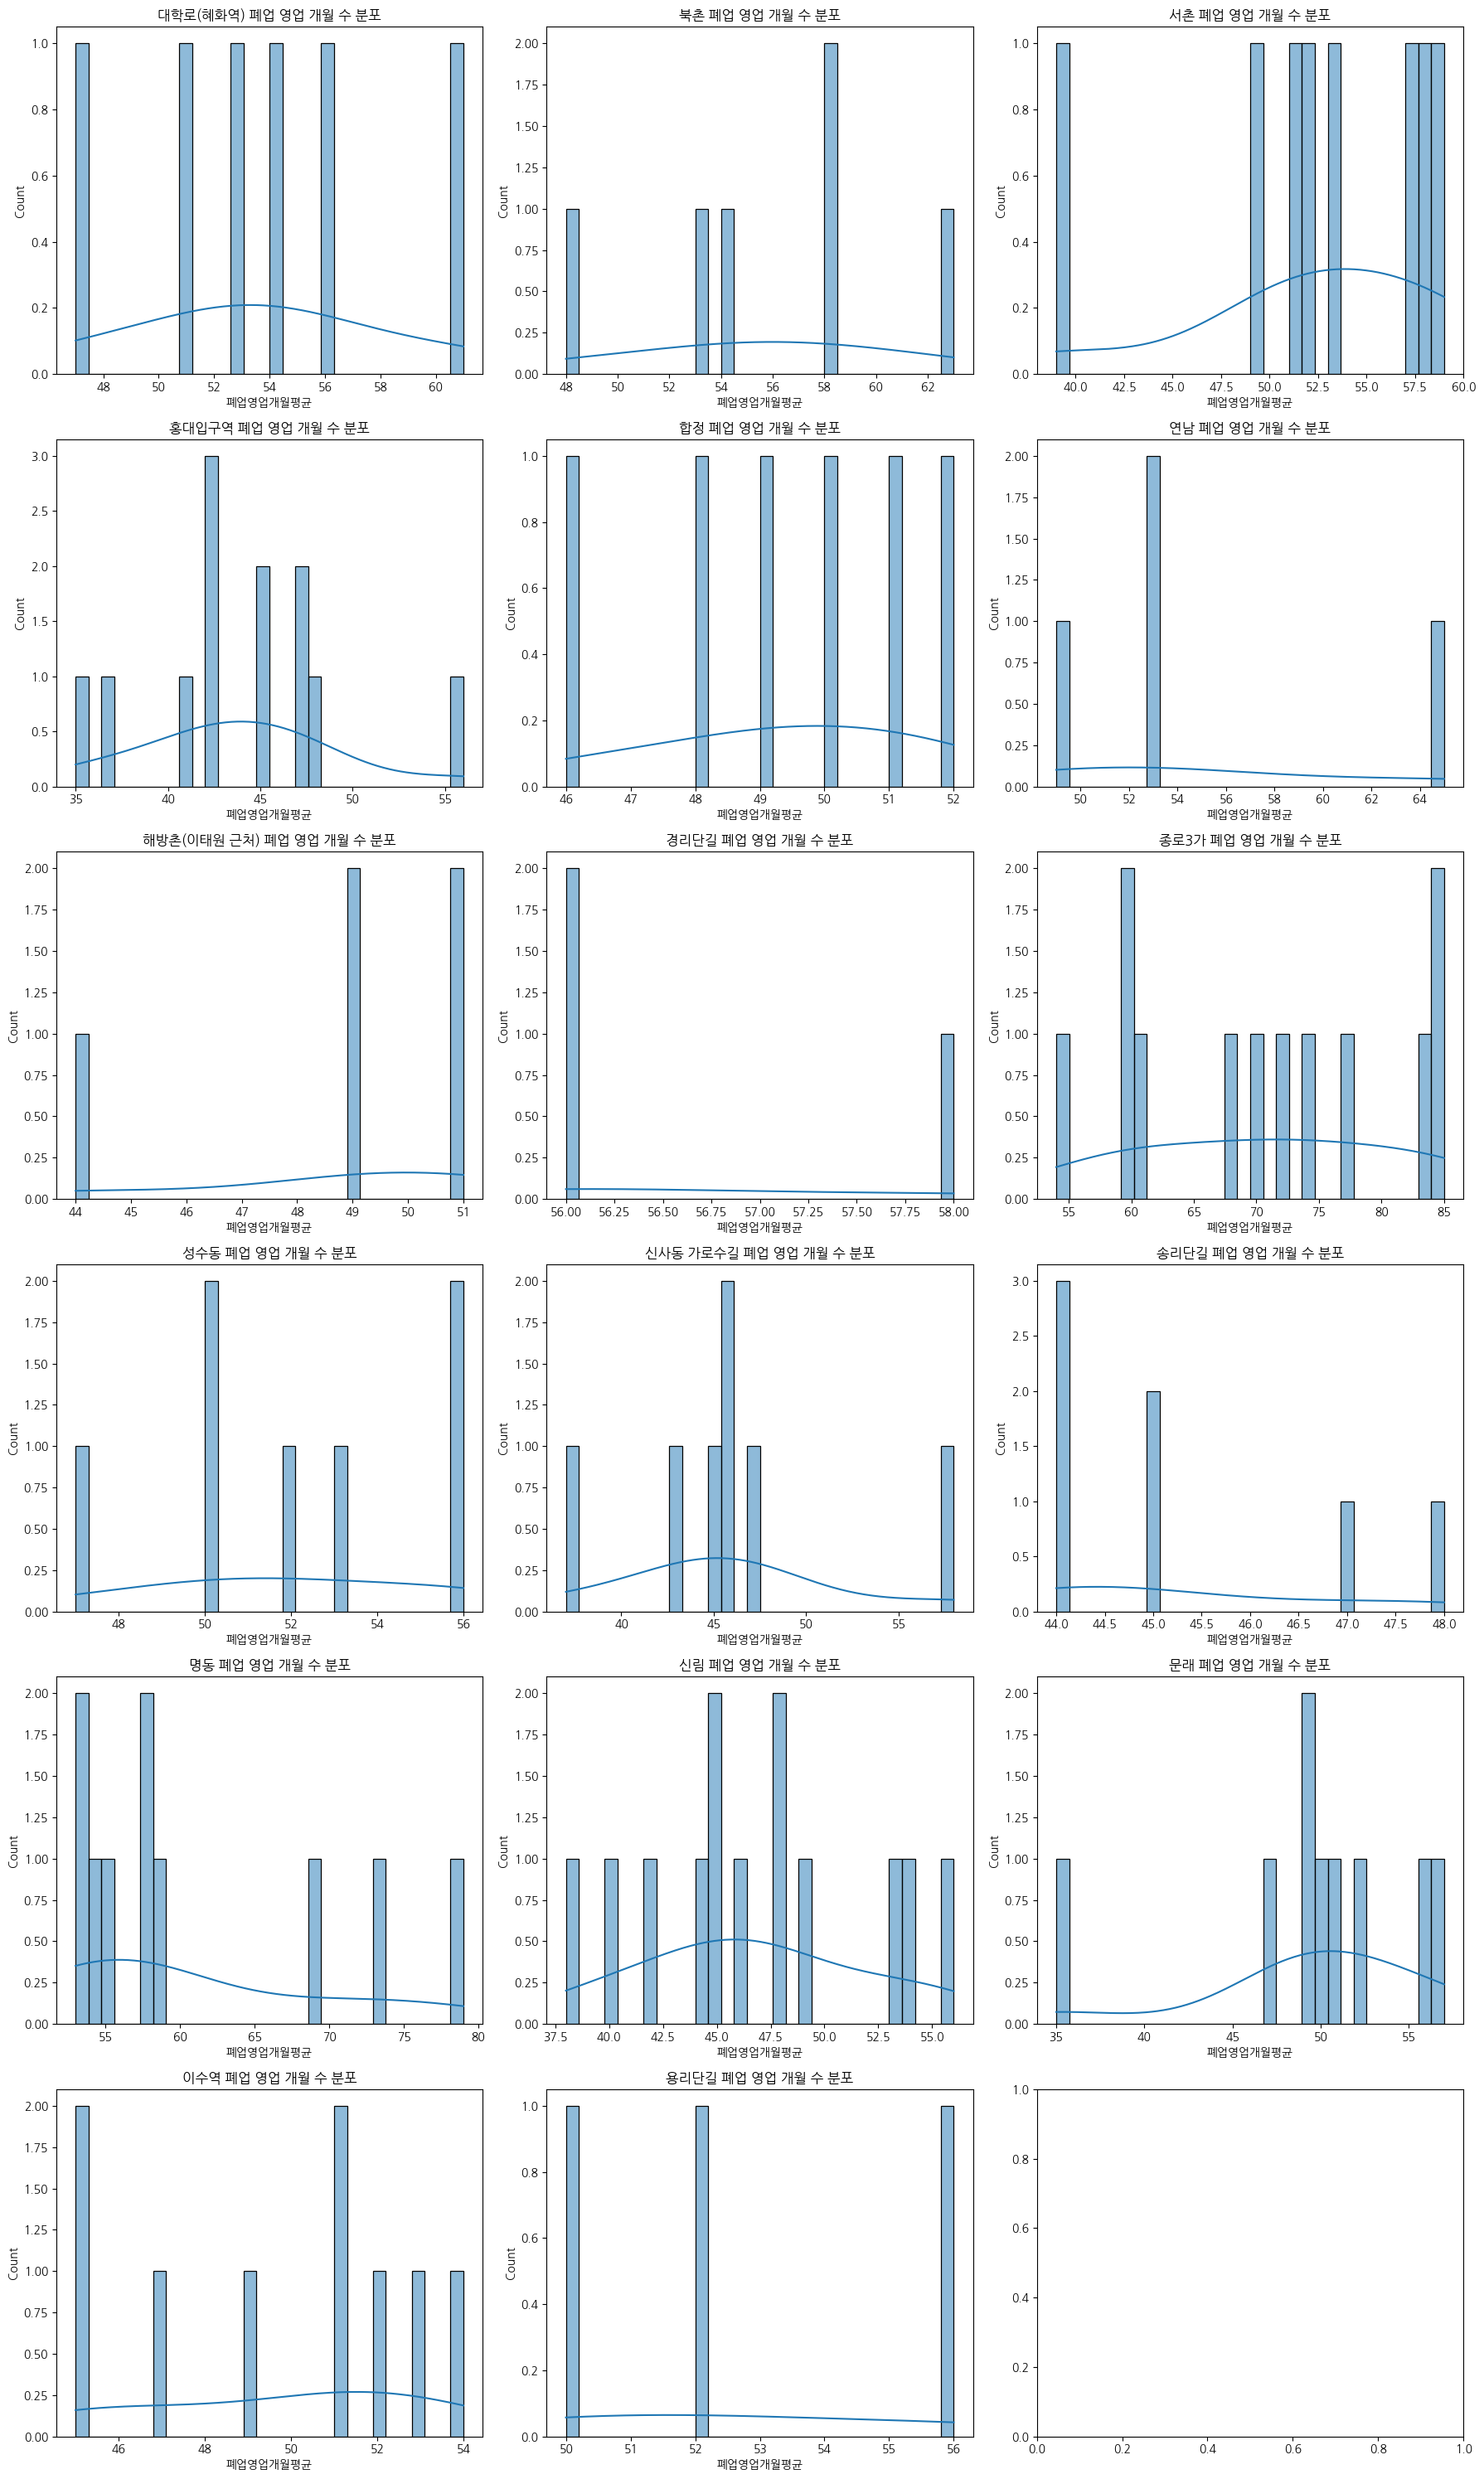

In [30]:
# 폐업 영업 개월 수 분포 시각화 (젠트리피케이션 지역)
num_cols = 3
num_rows_젠트 = -(-len(젠트리피케이션_지역) // num_cols)
fig, axes = plt.subplots(num_rows_젠트, num_cols, figsize=(18, 5 * num_rows_젠트))
axes = axes.flatten()

# fig, axes = plt.subplots(1, len(젠트리피케이션_지역), figsize=(18, 5))
for ax, 지역 in zip(axes, 젠트리피케이션_지역):
    sns.histplot(df_상권[df_상권["주소명"] == 지역]["폐업영업개월평균"], bins=30, kde=True, ax=ax)
    ax.set_title(f"{지역} 폐업 영업 개월 수 분포")
    ax.set_xlabel("폐업영업개월평균")
    ax.set_ylabel("Count")
plt.tight_layout()
plt.show()

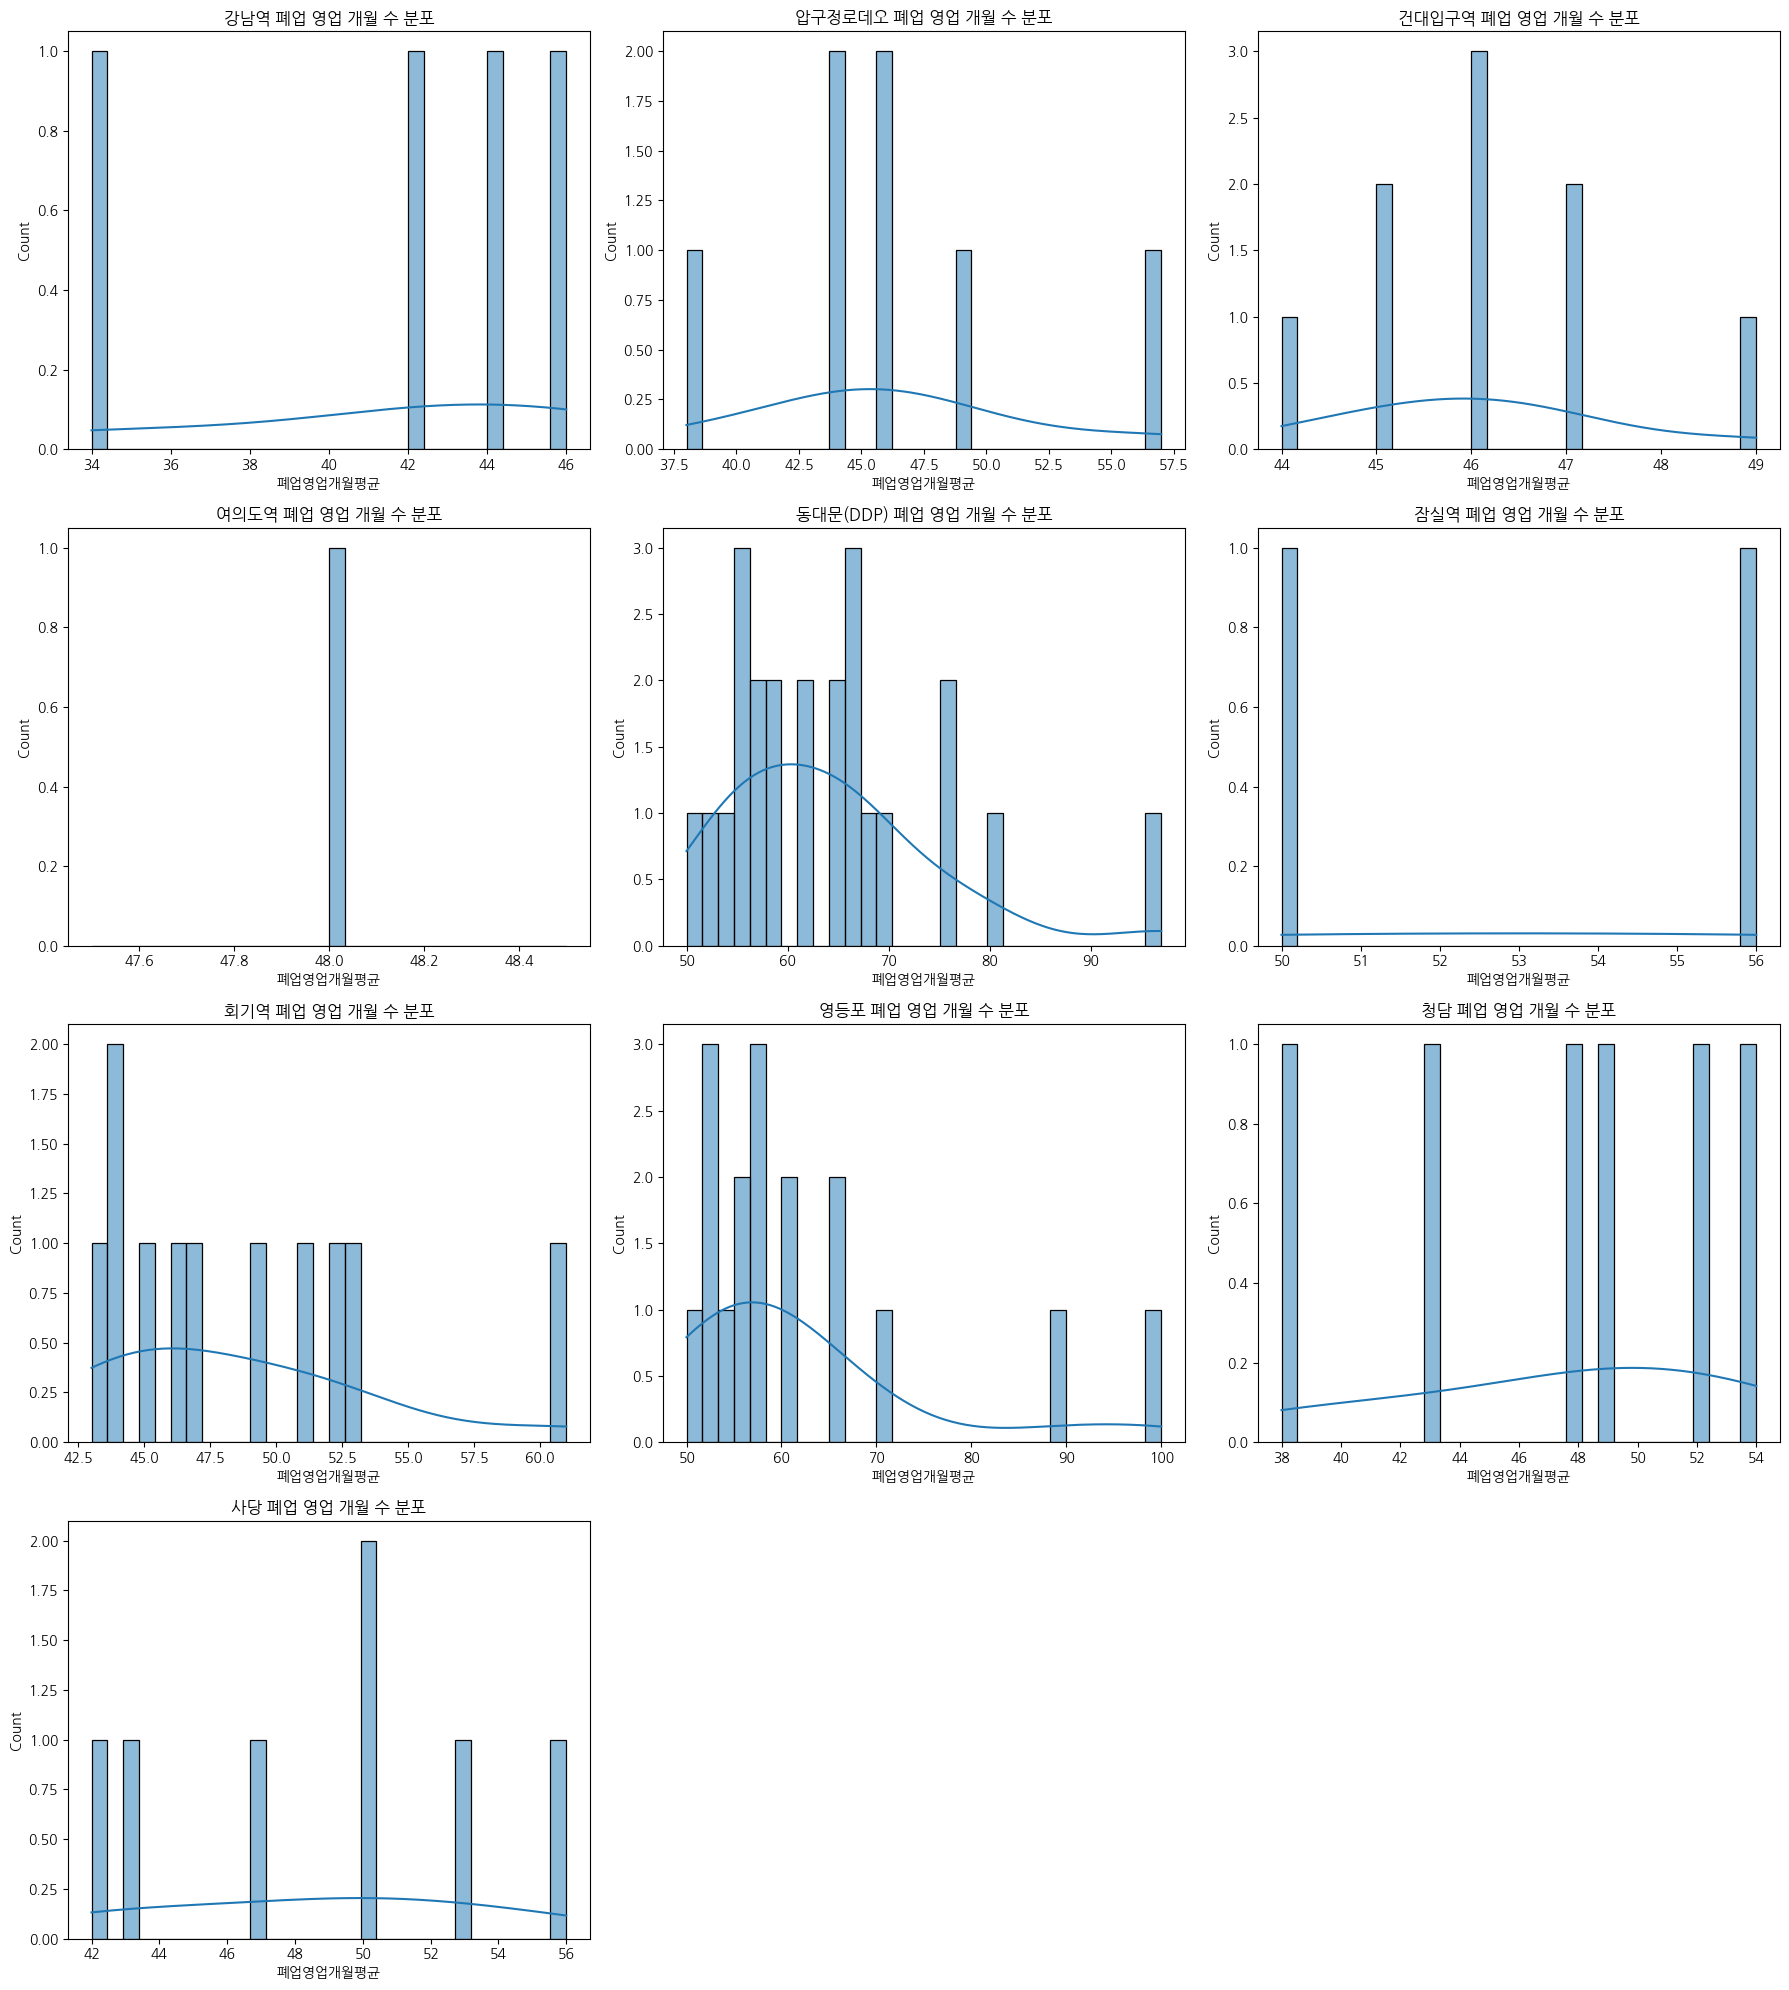

In [31]:
# 비젠트리피케이션 지역 분석
num_rows_비젠트 = -(-len(비젠트리피케이션_지역) // num_cols)
fig, axes = plt.subplots(num_rows_비젠트, num_cols, figsize=(18, 5 * num_rows_비젠트))
axes = axes.flatten()

for i, 지역 in enumerate(비젠트리피케이션_지역):
    sns.histplot(df_상권[df_상권["주소명"] == 지역]["폐업영업개월평균"], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f"{지역} 폐업 영업 개월 수 분포")
    axes[i].set_xlabel("폐업영업개월평균")
    axes[i].set_ylabel("Count")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## 기준년분시별 폐업개월 수 변화 분석 (젠트리피케이션지역, 비젠트리피케이션지역)

- 아무래도 가지고있는 기준분기별 데이터가 달라서 개월 수 변화를 시간순으로 보기에는 정확한 분석을 하기에 별로인듯함.

- 이건 빼고 봐주세요!!! (삭제하기에는 뭔가 다른 의견이 있을까 삭제는 안했음)

In [32]:
df_주소명_연남

,기준년분기코드,상권구분코드,상권구분코드명,상권코드,상권코드명,상권변화지표,상권변화지표명,운영영업개월평균,폐업영업개월평균,서울운영영업개월평균,서울폐업영업개월평균,주소명,카테고리
0,20241,R,전통시장,3130192,동진시장,HH,정체,124,53,103,52,연남,젠트리피케이션
1,20241,A,골목상권,3110506,연희임광아파트,LH,상권확장,91,53,103,52,연남,젠트리피케이션
2,20241,A,골목상권,3110558,경성고등학교,LL,다이나믹,80,49,103,52,연남,젠트리피케이션
3,20241,A,골목상권,3110501,연희어린이공원,HH,정체,109,65,103,52,연남,젠트리피케이션


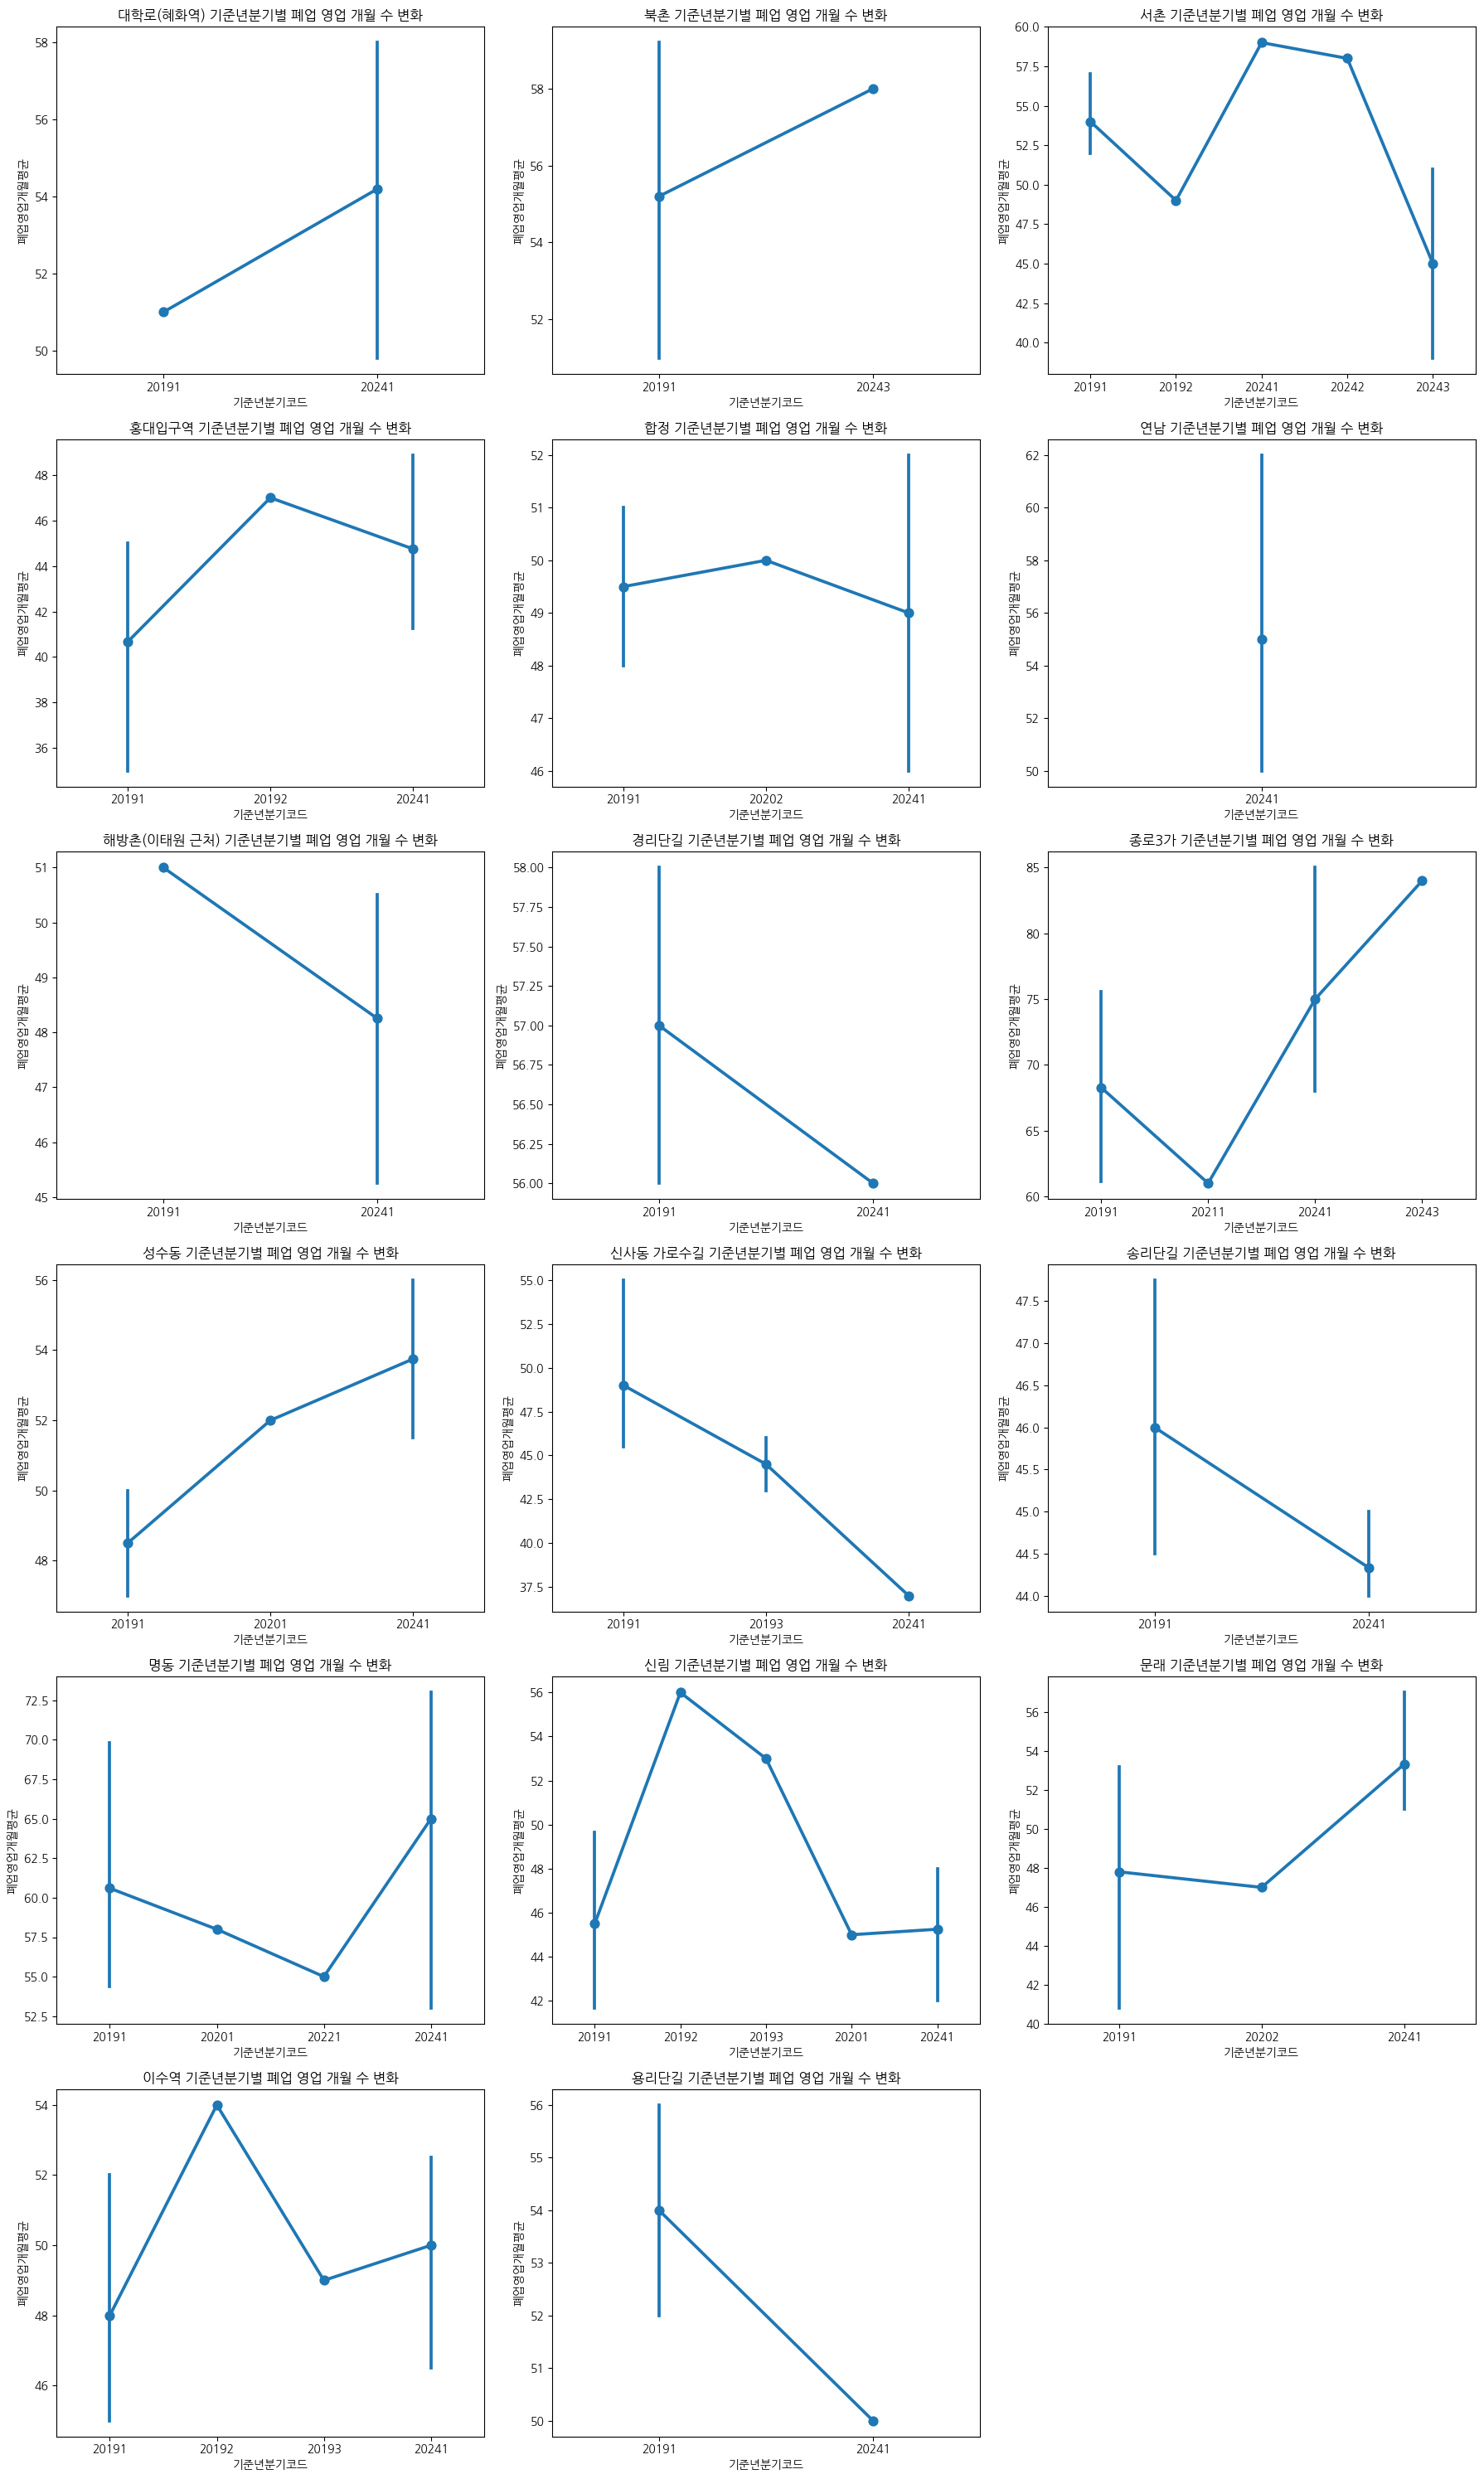

In [33]:
# 기준년분기별 폐업 개월 수 변화 시각화 (젠트리피케이션 지역)
fig, axes = plt.subplots(num_rows_젠트, num_cols, figsize=(18, 5 * num_rows_젠트))
axes = axes.flatten()

for i, 지역 in enumerate(젠트리피케이션_지역):
    sns.pointplot(data=df_상권[df_상권["주소명"] == 지역], x="기준년분기코드", y="폐업영업개월평균", ax=axes[i])
    axes[i].set_title(f"{지역} 기준년분기별 폐업 영업 개월 수 변화")
    axes[i].set_xlabel("기준년분기코드")
    axes[i].set_ylabel("폐업영업개월평균")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

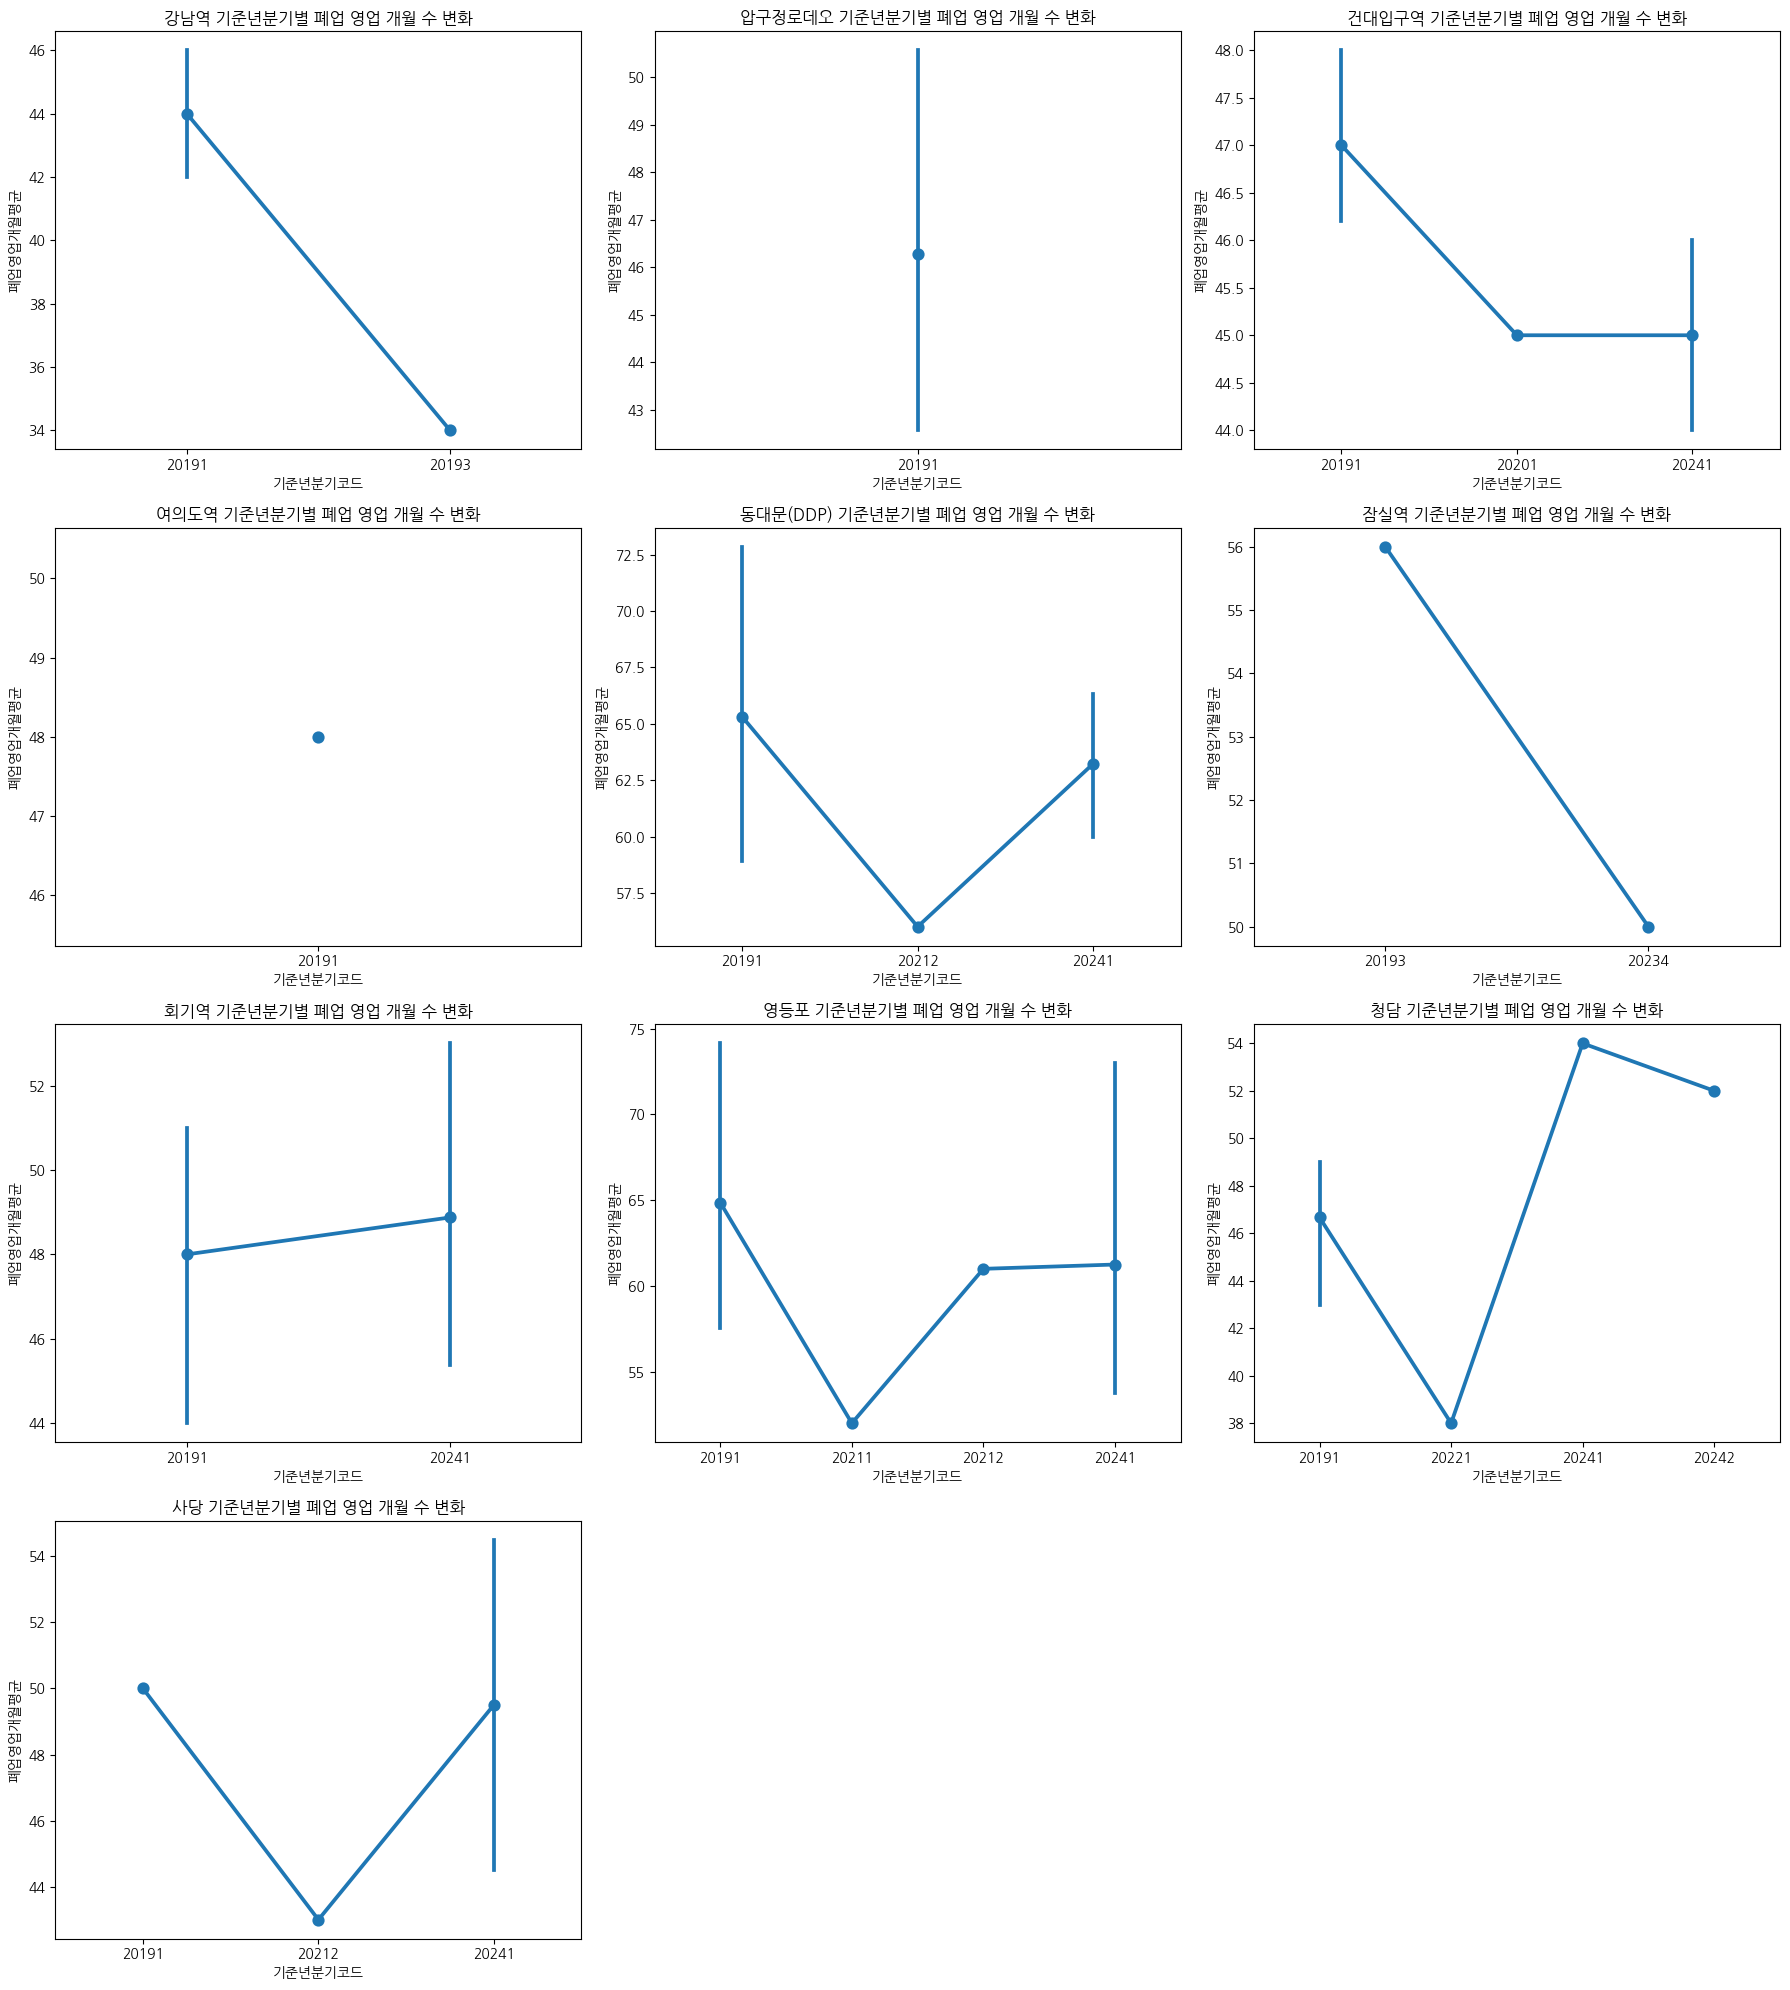

In [34]:
# 기준년분기별 폐업 개월 수 변화 시각화 (비젠트리피케이션 지역)
fig, axes = plt.subplots(num_rows_비젠트, num_cols, figsize=(18, 5 * num_rows_비젠트))
axes = axes.flatten()

for i, 지역 in enumerate(비젠트리피케이션_지역):
    sns.pointplot(data=df_상권[df_상권["주소명"] == 지역], x="기준년분기코드", y="폐업영업개월평균", ax=axes[i])
    axes[i].set_title(f"{지역} 기준년분기별 폐업 영업 개월 수 변화")
    axes[i].set_xlabel("기준년분기코드")
    axes[i].set_ylabel("폐업영업개월평균")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## 19년과 24년의 데이터 비교 분석

In [35]:
df_주소명_북촌

,기준년분기코드,상권구분코드,상권구분코드명,상권코드,상권코드명,상권변화지표,상권변화지표명,운영영업개월평균,폐업영업개월평균,서울운영영업개월평균,서울폐업영업개월평균,주소명,카테고리
0,20191,D,발달상권,3120009,종로3가역,HH,정체,121,58,93,48,북촌,젠트리피케이션
1,20191,D,발달상권,3120005,삼청동,LH,상권확장,79,53,93,48,북촌,젠트리피케이션
2,20191,D,발달상권,3120008,인사동,HH,정체,132,63,93,48,북촌,젠트리피케이션
3,20191,D,발달상권,3120007,북촌(안국역),HH,정체,94,54,93,48,북촌,젠트리피케이션
4,20191,A,골목상권,3110018,중앙고등학교,LL,다이나믹,89,48,93,48,북촌,젠트리피케이션
5,20243,A,골목상권,3110017,정독도서관,LH,상권확장,75,58,107,52,북촌,젠트리피케이션


In [36]:
def time_to_quarter(date) :
    year = int(str(date)[:4])
    quarter = int(str(date)[4:])
    month = (quarter-1) * 3 + 1
    return pd.Timestamp(year=year, month=month, day = 1)

In [37]:
df_category_non_gen = df_카테고리_비젠트리피케이션.copy()
df_category_non_gen['기준년분기코드'] = df_category_non_gen['기준년분기코드'].apply(time_to_quarter)
df_category_non_gen

,기준년분기코드,상권구분코드,상권구분코드명,상권코드,상권코드명,상권변화지표,상권변화지표명,운영영업개월평균,폐업영업개월평균,서울운영영업개월평균,서울폐업영업개월평균,주소명,카테고리
0,2019-01-01,D,발달상권,3120015,종로6가,HH,정체,129,62,93,48,동대문(DDP),비젠트리피케이션
1,2019-01-01,D,발달상권,3120016,동대문역,HH,정체,111,59,93,48,동대문(DDP),비젠트리피케이션
2,2019-01-01,D,발달상권,3120065,회기역,HH,정체,96,49,93,48,회기역,비젠트리피케이션
3,2019-01-01,D,발달상권,3120188,압구정역,HH,정체,93,49,93,48,압구정로데오,비젠트리피케이션
4,2019-01-01,D,발달상권,3120187,신논현역,LL,다이나믹,80,42,93,48,강남역,비젠트리피케이션
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,2024-01-01,A,골목상권,3110807,신길역 3번,LH,상권확장,80,58,103,52,영등포,비젠트리피케이션
83,2024-01-01,A,골목상권,3110788,영등포시장역 3번,HH,정체,123,61,103,52,영등포,비젠트리피케이션
84,2024-01-01,A,골목상권,3110800,영등포동성당,HH,정체,166,57,103,52,영등포,비젠트리피케이션
85,2024-01-01,A,골목상권,3110799,영등포본동주민센터,HH,정체,119,57,103,52,영등포,비젠트리피케이션


In [38]:
df_category_gen = df_카테고리_젠트리피케이션.copy()
df_category_gen['기준년분기코드'] = df_category_gen['기준년분기코드'].apply(time_to_quarter)
df_category_gen

,기준년분기코드,상권구분코드,상권구분코드명,상권코드,상권코드명,상권변화지표,상권변화지표명,운영영업개월평균,폐업영업개월평균,서울운영영업개월평균,서울폐업영업개월평균,주소명,카테고리
0,2019-01-01,D,발달상권,3120025,롯데백화점(시청광장 지하쇼핑센터),HH,정체,139,79,93,48,명동,젠트리피케이션
1,2019-01-01,D,발달상권,3120178,신사역,LL,다이나믹,85,47,93,48,신사동 가로수길,젠트리피케이션
2,2019-01-01,D,발달상권,3120140,문래동주민센터,LL,다이나믹,73,35,93,48,문래,젠트리피케이션
3,2019-01-01,D,발달상권,3120027,명동역(명동재미로),HH,정체,101,53,93,48,명동,젠트리피케이션
4,2019-01-01,D,발달상권,3120009,종로3가역,HH,정체,121,58,93,48,북촌,젠트리피케이션
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,2024-04-01,R,전통시장,3130001,통인시장,LH,상권확장,102,58,105,52,서촌,젠트리피케이션
123,2024-07-01,A,골목상권,3110017,정독도서관,LH,상권확장,75,58,107,52,북촌,젠트리피케이션
124,2024-07-01,A,골목상권,3110015,청와대사랑채,HL,상권축소,148,51,107,52,서촌,젠트리피케이션
125,2024-07-01,R,전통시장,3130033,대림상가(청계상가),HH,정체,170,84,107,52,종로3가,젠트리피케이션


In [39]:
df_non_pivot = df_category_non_gen.pivot_table(columns='기준년분기코드', index='주소명', values='폐업영업개월평균', aggfunc='mean')
df_non_pivot

기준년분기코드,2019-01-01,2019-07-01,2020-01-01,2021-01-01,2021-04-01,2022-01-01,2023-10-01,2024-01-01,2024-04-01
주소명,,,,,,,,,
강남역,44.000000,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
건대입구역,47.000000,NaN,45.0,NaN,NaN,NaN,NaN,45.000000,NaN
동대문(DDP),65.307692,NaN,NaN,NaN,56.0,NaN,NaN,63.222222,NaN
사당,50.000000,NaN,NaN,NaN,43.0,NaN,NaN,49.500000,NaN
압구정로데오,46.285714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
여의도역,48.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
영등포,64.857143,NaN,NaN,52.0,61.0,NaN,NaN,61.250000,NaN
잠실역,NaN,56.0,NaN,NaN,NaN,NaN,50.0,NaN,NaN
청담,46.666667,NaN,NaN,NaN,NaN,38.0,NaN,54.000000,52.0


In [40]:
df_non_pivot.columns

DatetimeIndex(['2019-01-01', '2019-07-01', '2020-01-01', '2021-01-01',
               '2021-04-01', '2022-01-01', '2023-10-01', '2024-01-01',
               '2024-04-01'],
              dtype='datetime64[ns]', name='기준년분기코드', freq=None)

In [41]:
# 2019-01-01 NaN 값 채우기
df_non_pivot.loc["잠실역", "2019-01-01"] = df_non_pivot.loc["잠실역", "2019-07-01"]

# 2024-01-01 NaN 값 채우기
df_non_pivot.loc["강남역", "2024-01-01"] = df_non_pivot.loc["강남역", "2019-07-01"]
df_non_pivot.loc["압구정로데오", "2024-01-01"] = df_non_pivot.loc["압구정로데오", "2019-01-01"]
df_non_pivot.loc["여의도역", "2024-01-01"] = df_non_pivot.loc["여의도역", "2019-01-01"]
df_non_pivot.loc["잠실역", "2024-01-01"] = df_non_pivot.loc["잠실역", "2023-10-01"]

df_non_pivot = df_non_pivot[["2019-01-01", "2024-01-01"]]

df_non_pivot

기준년분기코드,2019-01-01,2024-01-01
주소명,,
강남역,44.000000,34.000000
건대입구역,47.000000,45.000000
동대문(DDP),65.307692,63.222222
사당,50.000000,49.500000
압구정로데오,46.285714,46.285714
여의도역,48.000000,48.000000
영등포,64.857143,61.250000
잠실역,56.000000,50.000000
청담,46.666667,54.000000


In [42]:
df_gen_pivot = df_category_gen.pivot_table(columns='기준년분기코드', index='주소명', values='폐업영업개월평균', aggfunc='mean')
df_gen_pivot

기준년분기코드,2019-01-01,2019-04-01,2019-07-01,2020-01-01,2020-04-01,2021-01-01,2022-01-01,2024-01-01,2024-04-01,2024-07-01
주소명,,,,,,,,,,
경리단길,57.000000,NaN,NaN,NaN,NaN,NaN,NaN,56.000000,NaN,NaN
대학로(혜화역),51.000000,NaN,NaN,NaN,NaN,NaN,NaN,54.200000,NaN,NaN
명동,60.600000,NaN,NaN,58.0,NaN,NaN,55.0,65.000000,NaN,NaN
문래,47.800000,NaN,NaN,NaN,47.0,NaN,NaN,53.333333,NaN,NaN
북촌,55.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.0
서촌,54.000000,49.0,NaN,NaN,NaN,NaN,NaN,59.000000,58.0,45.0
성수동,48.500000,NaN,NaN,52.0,NaN,NaN,NaN,53.750000,NaN,NaN
송리단길,46.000000,NaN,NaN,NaN,NaN,NaN,NaN,44.333333,NaN,NaN
신림,45.500000,56.0,53.0,45.0,NaN,NaN,NaN,45.250000,NaN,NaN


In [43]:
# 2019-01-01 NaN 값 채우기
df_gen_pivot.loc["연남", "2019-01-01"] = df_gen_pivot.loc["연남", "2024-01-01"]

# 2024-01-01 NaN 값 채우기
df_gen_pivot.loc["북촌", "2024-01-01"] = df_gen_pivot.loc["북촌", "2024-07-01"]

df_gen_pivot = df_gen_pivot[["2019-01-01", "2024-01-01"]]

df_gen_pivot

기준년분기코드,2019-01-01,2024-01-01
주소명,,
경리단길,57.000000,56.000000
대학로(혜화역),51.000000,54.200000
명동,60.600000,65.000000
문래,47.800000,53.333333
북촌,55.200000,58.000000
서촌,54.000000,59.000000
성수동,48.500000,53.750000
송리단길,46.000000,44.333333
신림,45.500000,45.250000


In [44]:
# 변화량 컬럼 추가
df_non_pivot["변화량"] = df_non_pivot["2024-01-01"] - df_non_pivot["2019-01-01"]
df_gen_pivot["변화량"] = df_gen_pivot["2024-01-01"] - df_gen_pivot["2019-01-01"]

<ipython-input-44-ea8155646ecf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_pivot["변화량"] = df_non_pivot["2024-01-01"] - df_non_pivot["2019-01-01"]
<ipython-input-44-ea8155646ecf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gen_pivot["변화량"] = df_gen_pivot["2024-01-01"] - df_gen_pivot["2019-01-01"]


In [50]:
df_non_pivot.columns = df_non_pivot.columns.astype(str)
df_gen_pivot.columns = df_gen_pivot.columns.astype(str)

df_non_pivot.rename(columns={"2019-01-01 00:00:00": "2019-01-01", "2024-01-01 00:00:00": "2024-01-01"}, inplace=True)
df_gen_pivot.rename(columns={"2019-01-01 00:00:00": "2019-01-01", "2024-01-01 00:00:00": "2024-01-01"}, inplace=True)

<ipython-input-50-b8aab8e60e08>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_pivot.rename(columns={"2019-01-01 00:00:00": "2019-01-01", "2024-01-01 00:00:00": "2024-01-01"}, inplace=True)
<ipython-input-50-b8aab8e60e08>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gen_pivot.rename(columns={"2019-01-01 00:00:00": "2019-01-01", "2024-01-01 00:00:00": "2024-01-01"}, inplace=True)


### 기본통계분석
- 젠트리피케이션 지역은 2019년 대비 2024년 평균 폐업 개월 수가 증가한 반면, 비젠트리피케이션 지역은 감소함.

 - 젠트리피케이션 지역: +0.99개월 증가

 - 비젠트리피케이션 지역: -1.60개월 감소

이는 젠트리피케이션 지역에서는 점포의 운영 기간이 오히려 늘어나는 경우도 존재한다는 것을 의미함.
비젠트리피케이션 지역은 폐업 개월 수 감소폭이 크고, 변화량의 최소값도 더 낮음.

-----

표준편차(변동성) 비교

비젠트리피케이션 지역의 표준편차가 더 크다. (폐업 개월 수 변동이 큼)
젠트리피케이션 지역은 2024년 표준편차가 증가했음. (일부 지역에서 극단적인 변화가 발생)


In [51]:
# 비젠트리피케이션 지역 기본 통계
df_non_pivot.describe()

기준년분기코드,2019-01-01,2024-01-01,변화량
count,10.000000,10.000000,10.000000
mean,51.611722,50.013294,-1.598428
std,7.767387,8.284520,4.553440
min,44.000000,34.000000,-10.000000
25%,46.750000,46.714286,-3.226725
50%,48.000000,49.187500,-1.250000
75%,54.500000,53.000000,0.000000
max,65.307692,63.222222,7.333333


In [52]:
# 젠트리피케이션 지역 기본 통계
df_gen_pivot.describe()

기준년분기코드,2019-01-01,2024-01-01,변화량
count,17.000000,17.000000,17.000000
mean,51.826611,52.815686,0.989076
std,6.426254,8.729743,4.619238
min,40.666667,37.000000,-12.000000
25%,48.000000,48.250000,-1.000000
50%,51.000000,53.333333,2.000000
75%,55.000000,56.000000,4.400000
max,68.285714,75.000000,6.714286


# 가설 검증: 젠트리피케이션 지역은 폐업 영업 평균 개월 수가 짧을 것이다.

### 1. 분석 결과 요약

  - 운영 개월 수 비교:
    - 젠트리피케이션 지역의 평균 운영 개월 수(99.76개월)는 비젠트리피케이션 지역(104.99개월)보다 낮음.
    - 즉, 젠트리피케이션 지역에서는 가게 운영 기간이 상대적으로 짧음 → 상권이 불안정할 가능성이 높음.

  - 폐업 개월 수 비교:
    - 젠트리피케이션 지역의 평균 폐업 개월 수(52.38개월)는 비젠트리피케이션 지역(54.60개월)보다 짧음.
    - 이는 폐업하는 점포들이 더 빠르게 문을 닫는다는 것을 의미함.

  - 개별 지역 분석:
    - 젠트리피케이션 지역 중 홍대입구역, 신림, 해방촌, 송리단길 등은 폐업 개월 수가 40~50개월로 짧음.
    - 반면, 종로3가, 명동, 북촌 등 일부 지역은 폐업 개월 수가 60개월 이상으로 유지되는 예외적인 경우도 존재함.
    - 즉, 젠트리피케이션 지역 내에서도 지역별 차이가 존재하지만, 전반적으로 폐업 개월 수가 짧은 경향이 강함.

  - 비젠트리피케이션 지역의 폐업 개월 수 분포:
    - 영등포, 동대문(DDP), 여의도역 등은 폐업 개월 수가 50개월 이상 유지되는 사례가 많음.
    - 일부 지역에서는 60~100개월까지 유지되는 경우도 존재함.
    - 강남역, 청담, 건대입구역 등은 폐업 개월 수가 40~50개월로 짧지만, 젠트리피케이션 지역보다 폐업 개월 수의 편차가 작고 일정한 분포를 유지하는 경향이 있음.

### 2. 가설 검증 결과

  - 가설: "젠트리피케이션 지역은 폐업 영업 평균 개월 수가 짧을 것이다."
  - 결과: **대체로 가설이 맞음**.  
    - 젠트리피케이션 지역의 평균 폐업 개월 수는 52.38개월로, 비젠트리피케이션 지역(54.60개월)보다 짧음.
    - 즉, 젠트리피케이션 지역에서 폐업하는 업장들이 더 빠르게 문을 닫는 경향이 확인됨.

### 3. 가설이 맞는 이유

  - 젠트리피케이션 지역은 빠르게 변화하는 상권 특징을 가짐.
  - 임대료 상승, 소비 트렌드 변화, 상업 지구의 변화 등으로 인해 점포 운영이 지속되기 어려운 환경이 조성됨.
  - 창업과 폐업이 반복적으로 이루어지며, 폐업 개월 수도 짧아지는 경향을 보임.

### 4. 예외적 사례 및 고려해야 할 점

  - 젠트리피케이션 지역에서도 종로3가, 명동, 북촌 등은 폐업 개월 수가 60개월 이상으로 길게 유지되는 경우가 있음.
    - 이는 해당 지역들이 관광객 유입이 많거나 고정적인 상권이 존재하여 폐업 속도가 상대적으로 느려질 수 있기 때문임.
  - 비젠트리피케이션 지역에서도 강남역, 건대입구역, 청담 등은 폐업 개월 수가 40~50개월로 짧은 경향을 보임.
    - 즉, 모든 젠트리피케이션 지역이 폐업 개월 수가 짧고, 모든 비젠트리피케이션 지역이 길다고 일반화할 수는 없음.

### 5. 최종 결론

  - 전반적으로 젠트리피케이션 지역은 폐업 개월 수가 짧아지는 경향을 보이며, 이는 가설과 부합함.
  - 다만, 일부 예외적인 지역이 존재하므로, 지역별 특성을 고려하여 해석해야 함. (팀원들의 다른 데이터들을 보면서 예외인 지역이 왜 그런지에 대해 다시 생각해 보면 좋을 듯함.)